 
   # EXPLORACIÓN DE LOS DATOS

## DATOS DE CASOS POR EDADES - FICHERO TIMEAGE.CSV

### ESTADÍSTICAS BÁSICAS

In [1]:
# Cargamos la librería dplyr
library(dplyr)
# Instalación del paquete ggplot2. Una vez ha sido instalado, lo dejamos comentado
#install.packages("ggplot2")
Cargamos la librería ggplot2
library(ggplot2)

ERROR: Error in parse(text = x, srcfile = src): <text>:5:10: unexpected symbol
4: #install.packages("ggplot2")
5: Cargamos la
            ^


In [4]:
# buscar la ruta del archivo de csv
file.choose()

[1] "C:\\Users\\pablo\\COVID-19\\datasets\\TotalTimeAge.csv"

Cargamos los datos de casos agupados por rangos de edades

In [2]:
# importar datos fechas_temp
total_edades <- read.table('C:\\Users\\pablo\\COVID-19\\datasets\\TotalTimeAge.csv', skip = 0, header = TRUE, sep =",")
head(total_edades,9)

,ï..age,confirmed,deceased
,<chr>,<int>,<int>
1,0s,157,0
2,10s,655,0
3,20s,3176,0
4,30s,1292,2
5,40s,1521,3
6,50s,2039,15
7,60s,1405,39
8,70s,725,80
9,80s,498,131


Ver la cantidad de valores NaN en las columnas

In [13]:
summarise_all(total_edades, funs(sum(is.na(.))))

ERROR: Error in summarise_all(total_edades, funs(sum(is.na(.)))): no se pudo encontrar la función "summarise_all"


Sobre la columna **confirmed** realizar un análisis incluyendo el cálculo de medidas de tendencia central, de dispersión y de forma, apoyando los resultados sobre los gráficos necesarios y comentando las deducciones realizadas.

# Medidas de Tendencia Central

La columna **confirmed** contiene el total de confirmados por rango de edad

In [3]:
summary(total_edades)

    ï..age            confirmed       deceased  
 Length:9           Min.   : 157   Min.   :  0  
 Class :character   1st Qu.: 655   1st Qu.:  0  
 Mode  :character   Median :1292   Median :  3  
                    Mean   :1274   Mean   : 30  
                    3rd Qu.:1521   3rd Qu.: 39  
                    Max.   :3176   Max.   :131  

**Media**: la suma de todos los valores dividida entre el número total de datos. Esta medida nos da información sobre la posición de la variable, podemos interpretarla como el centro de gravedad de los datos

**Mediana**: es el valor central de nuestros datos, por lo que este valor cumplirá que la mitad de los valores serán mayores que él y la otra mitad serán menores. Tiene la ventaja respecto a la media de que no es sensible a valores atípicos

Vemos que la Media Mayor a la Mediana. Esto ya apunta a que no tendremos una Distribución Simétrica, sino algo sesgada hacia la derecha.

**Moda**: representa el valor más repetido dentro de conjunto de datos. A diferencia de los anteriores, la moda no tiene porqué ser única, se puede dar el caso de analizar unos datos con una distribución que presente dos, tres o más modas, en estos casos hablaremos de distribuciones bimodales o trimodales.

La moda no está implementada en el paquete básico de R, pero podemos utilizar una función creada por nosotros mismos para el cálculo de la misma:

In [1]:
# Función creada por el usuario para el cálculo de la Moda
moda <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]}

### ANÁLISIS CAMPO **CONFIRMED**

In [5]:
# Cálculo de la Moda
moda(total_edades$confirmed)

[1] 157

La Media > Mediana > Moda

Cuartiles: Un cuantil es un valor que dentro de un conjunto de datos ordenándolos de menor a mayor los divide en dos grupos. El caso más utilizado de cuantiles son los cuartiles.
Los cuartiles dividen la variable aleatoria en 4 grupos, donde cada uno tiene un 25% de los elementos.
Hay 3 cuartiles:

- Q1: que representa aquel que es mayor que el 25% de los elementos de los valores.

- Q2: que representa aquel que es mayor que el 50% de los elementos de los valores. Es la mediana.

- Q3: que representa aquel que es mayor que el 75% de los elementos de los valores.

In [23]:
quantile(total_edades$confirmed, 0.25)
quantile(total_edades$confirmed, 0.75)

25% 
655

75% 
1521

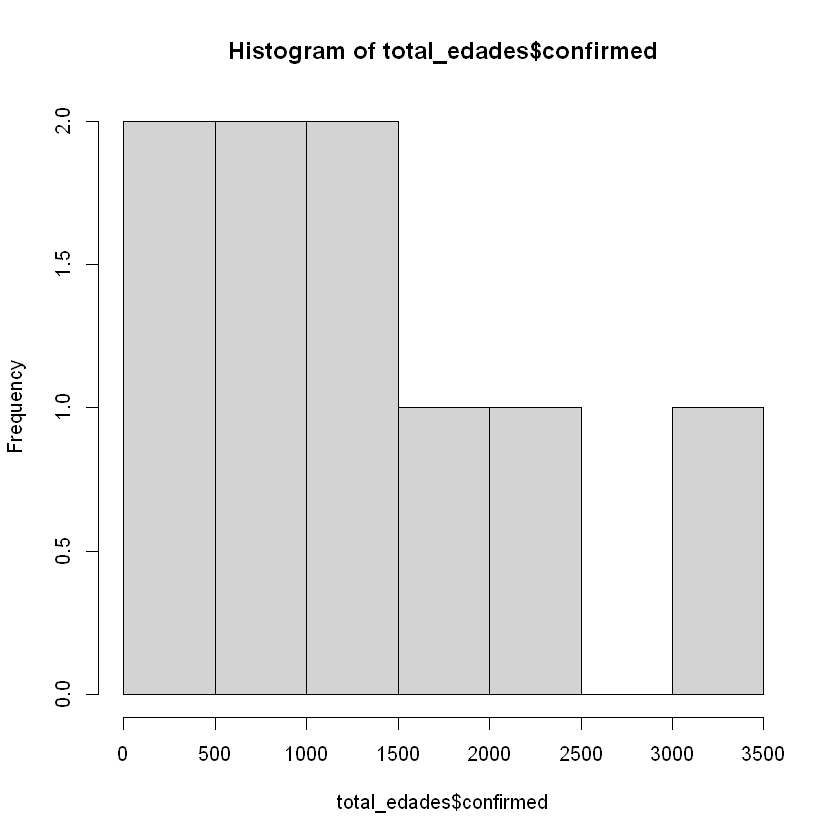

In [6]:
# Creación del Histograma
hist(total_edades$confirmed)

Vemos que la distribución está un poco sesgada hacia la derecha, es decir, se aprecia una cola hacia la derecha. Vamos a realizar una visualización en la que podamos apreciar esto mejor, utilizando ggplot2. Instalamos el paquete ggplot2, y cargamos la librería:

In [7]:
# Instalación del paquete ggplot2. Una vez ha sido instalado, lo dejamos comentado
#install.packages("ggplot2")
# Cargamos la librería ggplot2
library(ggplot2)

A continuación crearemos el Gráfico de una sóla vez, añadiendo más mejoras y Valores: Media, Cuantil 25 y Cuantil 75

Warning message:
"Use of `total_edades$confirmed` is discouraged. Use `confirmed` instead."
Warning message:
"Use of `total_edades$confirmed` is discouraged. Use `confirmed` instead."
Warning message:
"Use of `total_edades$confirmed` is discouraged. Use `confirmed` instead."
Warning message:
"Use of `total_edades$confirmed` is discouraged. Use `confirmed` instead."
Warning message:
"Use of `total_edades$confirmed` is discouraged. Use `confirmed` instead."
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



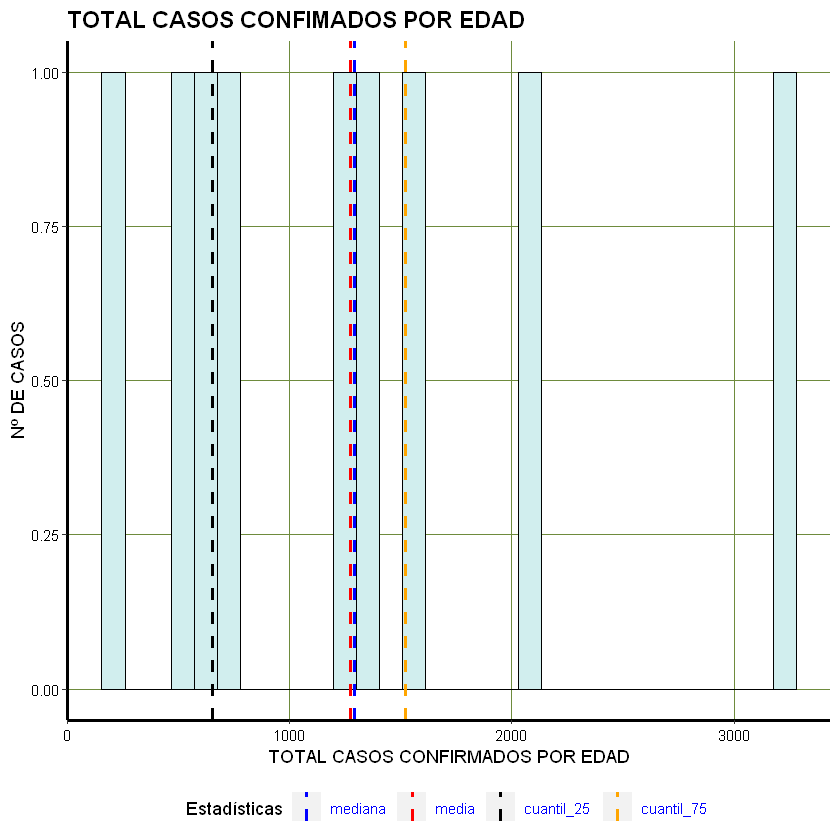

In [51]:
RellenoBarras <- "lightcyan2"
LineaBarras <- "black"

ggplot(aes(x = total_edades$confirmed), data = total_edades) + 
      geom_histogram(colour = LineaBarras, fill = RellenoBarras) +
      labs(title="TOTAL CASOS CONFIMADOS POR EDAD") +
      theme(axis.line = element_line(size=1, colour = "black"),
              # Líneas de división mayores de la escala de los ejes del Gráfico de color azul
              panel.grid.major = element_line(colour = "darkolivegreen4"),
              # Líneas de división menores de la escala de los ejes del Gráfico de color blanco
              panel.grid.minor = element_blank(),
              # Bordes dl Gráfico de color Blanco
              panel.border = element_blank(), panel.background = element_blank(),
              # Formato Título: Tamaños 14 y Negrita
              plot.title = element_text(size = 14, face = "bold"),
              # Eje X de color negro. Tamaño fuente 9
              axis.text.x=element_text(colour="black", size = 9),
              # Ponemos la leyenda en la parte infrior
              legend.position="bottom",
              # Texto de la leyenda n azul. Tamaño de fuent 9
              legend.text=element_text(colour="blue",size=9),
              # Eje Y de color negro. Tamaño fuente 9
              axis.text.y=element_text(colour="black", size = 9))+

# Mostrar la Mediana
      geom_vline(aes(xintercept=median(total_edades$confirmed),
                 color="mediana"), linetype="dashed",
             size=1) +
# Mostrar la Media
      geom_vline(aes(xintercept = mean(total_edades$confirmed),
                 color="media"), linetype="dashed",
             size=1) +
# Mostrar el Cuantil 25
      geom_vline(aes(xintercept = quantile(total_edades$confirmed, 0.25),
                 color="cuantil_25"), linetype="dashed",
             size=1) +
# Mostrar el Cuantil 75
      geom_vline(aes(xintercept = quantile(total_edades$confirmed, 0.75),
                 color="cuantil_75"), linetype="dashed",
             size=1) +
# Nombre d la Leyenda ·Estadísticas". Colores de las medidas: Medina (Azul), Media (Rojo), Cuantil 25 (Negro)
# y Cuantil 75 (Naranja) 
        scale_color_manual(name = "Estadísticas", values = c(mediana = "blue", media = "red", cuantil_25 = "black", 
                                                     cuantil_75 = "orange"))+
# Texto del eje X "TOTAL CASOS CONFIRMADOS" y del eje Y "Nº DE CASOS"
  xlab("TOTAL CASOS CONFIRMADOS POR EDAD") + ylab("Nº DE CASOS")

Veamos el Gráfico de Densidad vs Histograma, con la Mediana en Negro y la Media en Rojo. Se aprecia la asimetría a la derecha

Warning message:
"Use of `total_edades$confirmed` is discouraged. Use `confirmed` instead."
Warning message:
"Use of `total_edades$confirmed` is discouraged. Use `confirmed` instead."
Warning message:
"Use of `total_edades$confirmed` is discouraged. Use `confirmed` instead."
Warning message:
"Use of `total_edades$confirmed` is discouraged. Use `confirmed` instead."
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



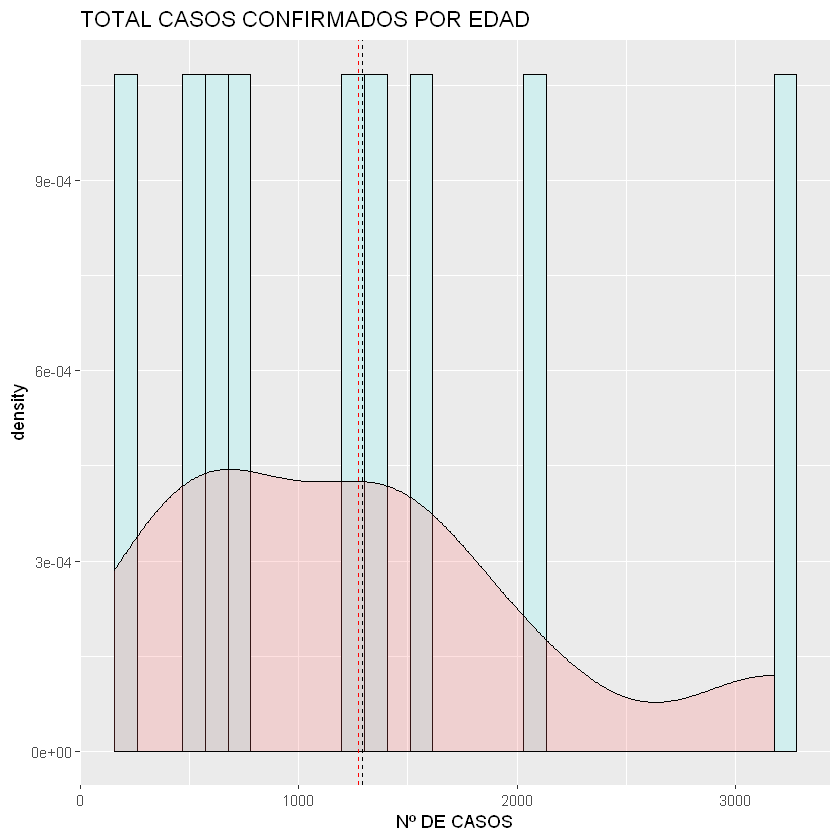

In [53]:
# Histogram with density plot
ggplot(total_edades, aes(x=total_edades$confirmed)) + 
     geom_histogram(aes(y=..density..), colour="black", fill="lightcyan2")+
     geom_density(alpha=.2, fill="#FF6666") +
     geom_vline(aes(xintercept=median(total_edades$confirmed)),color="black", linetype="dashed") + 
     geom_vline(aes(xintercept=mean(total_edades$confirmed)),color="red", linetype="dashed") +
     labs(title="TOTAL CASOS CONFIRMADOS POR EDAD") + xlab("Nº DE CASOS")


Esta misma información también se puede visualizar con un boxplot

Vamos a ver los elementos de un Boxplot, y que información nos dan:
- La línea inferior de la caja es el Cuantil 25
- La línea superior de la caja es el Cuantil 75
- La línea interior de la caja es la mediana. Al no estar en el centro de la caja, y más cerca de la parte inferior de la caja, no es simétrica, y nos indica que hay un sesgo hacía la derecha, es decir, la distribución teien una pequeña cola hacia la derecha.
- Las líneas verticales, arriba y abajo de la caja, son los bigotes, y se extienden hasta los valores máximo y mínimo de los valores o hasta 1,5 veces el RIC (rango intercuartílico)- Cuando los datos se extienden más allá de esto, significa que hay valores atípicos en la serie y entonces hay que calcular los límites superior e inferior, Li y Ls. Para ello, se consideran atípicos los valores inferiores a Q1–1.5·RIC o superiores a Q3+1.5·RIC.
- Los puntos que vemos fuera de los bigotes, son datos atípicos

Warning message:
"Use of `total_edades$confirmed` is discouraged. Use `confirmed` instead."
Warning message:
"Use of `total_edades$confirmed` is discouraged. Use `confirmed` instead."
Warning message:
"Use of `total_edades$confirmed` is discouraged. Use `confirmed` instead."


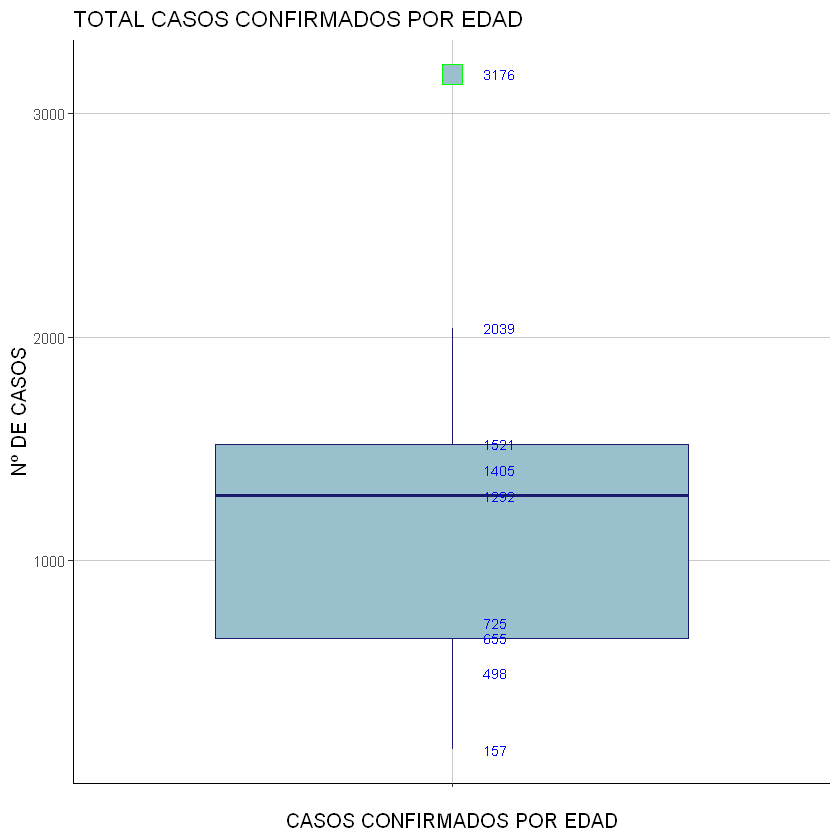

In [10]:
# Creamos dos variables para poner el color de relleno de la caja, y el color del borde de la caja Estas variables
# serán pasadas en la geometría
relleno <- "lightblue3"
linea <- "midnightblue"

bp2 <- ggplot(total_edades, aes(x = "", y = total_edades$confirmed)) +
        # Mostramos los Outliers con forma de cuadrado, y de color verde
        geom_boxplot(fill = relleno, colour = linea,outlier.colour = "green", outlier.size = 6,outlier.shape = 22) +
        scale_y_continuous(name = "Nº DE CASOS") + 
        scale_x_discrete(name = "CASOS CONFIRMADOS POR EDAD") +
        ggtitle("TOTAL CASOS CONFIRMADOS POR EDAD") +
        # Ponemos color Negro a los ejes X e Y
        theme(axis.line.x = element_line(size = 0.5, colour = "black"),
              axis.line.y = element_line(size = 0.5, colour = "black"),
              axis.title = element_text(size = 12),
              # Ponemos título al Gráficco
              legend.text = element_text(size = 9),
              legend.title=element_text(face = "bold", size = 9),
              # Mostramos la escala mayor
              panel.grid.major = element_line(colour = "snow3"),
              panel.grid.minor = element_blank(),
              panel.border = element_blank(),
              #Ponrmos Blanco como color de fondo del Gráfico
              panel.background = element_blank()) +
          # Mostramos los valores de los Anchos de Sépalo
          geom_text(aes(label=total_edades$confirmed),hjust=0,nudge_x=0.05,color="blue",size=3)

bp2

Si analizamos el Histograma y el Boxplot, podemos ver que hay un valor atípico: **3176** que correspond  la rango de edad **20s**. Este valor se pude decir que es un Outlier, ya que está fuera del alcance de los bigotes del Boxplot.

A partir de todo lo que hemos analizado, podemos sacar diferentes conclusiones sobre la forma de la distribución:

- Conclusión 1: gracias al histograma, y aunque la mediana está muy cercana a la media, vemos que la distribución está sesgada hacía la
derecha, es decir, existe una pequeña cola a la derecha, por lo tanto, no tenemos una distribución normal o simétrica. Esto podremos
analizarlo en detalle cuando veamos las medidas de simetría.
- Conclusión 2: los cuantiles 25 y 75, no están a la misma distancia de la mediana (Ver BoxPlot). Hay una mayor distancia entre el cuantil 75 y la
mediana, que entre el cuantil 25 y la mediana (Ver BoxPlot). Esto último puede significar que hay un mayor apelotonamiento de los datos.
en esta zona.
- Conclusión 3: debido a todo esto parece que estemos ante una asimetría positiva.
- Conclusión 4: tenemos un dato atípico (outliers) para la edad de 20s de valor **3176**, que, si lo eliminaremos, la distribución podría ser simétrica. Esto será analizado más adelante.


Warning message:
"Use of `total_edades$deceased` is discouraged. Use `deceased` instead."
Warning message:
"Use of `total_edades$deceased` is discouraged. Use `deceased` instead."
Warning message:
"Use of `total_edades$deceased` is discouraged. Use `deceased` instead."


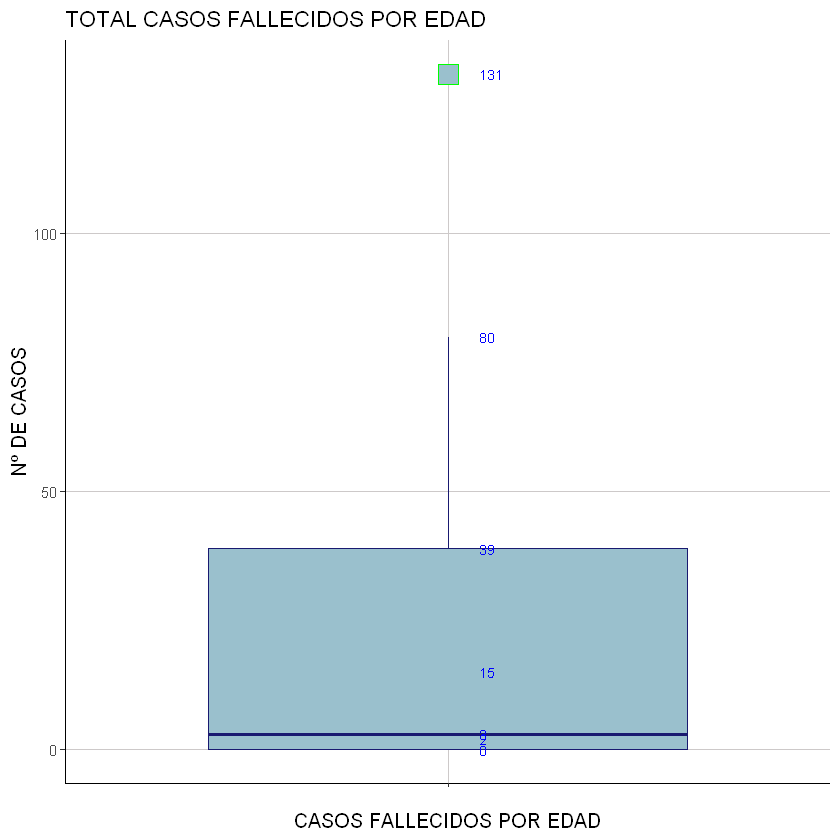

In [54]:
# Creamos dos variables para poner el color de relleno de la caja, y el color del borde de la caja Estas variables
# serán pasadas en la geometría
relleno <- "lightblue3"
linea <- "midnightblue"

bp2 <- ggplot(total_edades, aes(x = "", y = total_edades$deceased)) +
        # Mostramos los Outliers con forma de cuadrado, y de color verde
        geom_boxplot(fill = relleno, colour = linea,outlier.colour = "green", outlier.size = 6,outlier.shape = 22) +
        scale_y_continuous(name = "Nº DE CASOS") + 
        scale_x_discrete(name = "CASOS FALLECIDOS POR EDAD") +
        ggtitle("TOTAL CASOS FALLECIDOS POR EDAD") +
        # Ponemos color Negro a los ejes X e Y
        theme(axis.line.x = element_line(size = 0.5, colour = "black"),
              axis.line.y = element_line(size = 0.5, colour = "black"),
              axis.title = element_text(size = 12),
              # Ponemos título al Gráficco
              legend.text = element_text(size = 9),
              legend.title=element_text(face = "bold", size = 9),
              # Mostramos la escala mayor
              panel.grid.major = element_line(colour = "snow3"),
              panel.grid.minor = element_blank(),
              panel.border = element_blank(),
              #Ponrmos Blanco como color de fondo del Gráfico
              panel.background = element_blank()) +
          # Mostramos los valores de los casos de fallecidos
          geom_text(aes(label=total_edades$deceased),hjust=0,nudge_x=0.05,color="blue",size=3)

bp2

# Medidas de Dispersión

Con la Medidas de Dispersión, podremos analizar la dispersión de los datos, es decir, vamos a medir lo lejos o cerca que están los valores respecto a la media.

Varianza: La varianza nos va a servir para determinar la dispersión de los valores de la variable alrededor de la media. Así, si los valores están alejados de su valor medio, la varianza será grande
y si están muy próximos a ella, la varianza será pequeña y podremos intuir que las medidas están concentradas alrededor de la media.

De la misma manera que ocurre con la media es muy sensible de datos extremos y cuanto más se acerque su valor a cero podemos deducir que los datos están más concentrados alrededor de la media de la variable aleatoria

In [11]:
# Cálculo de la varianza
var(total_edades$confirmed)

[1] 851968.7

Desviación típica: se define como la raíz cuadrada de la varianza de la variable. Sirve principalmente para conocer la desviación que presentan los datos en su distribución respecto a la media aritmética de dicha distribución

In [12]:
# Cálculo de la desviación Típica
sd(total_edades$confirmed)

[1] 923.0215

# Medidas de Forma

La asimetría será un indicador sobre el aspecto que tiene una distribución utilizando como eje el valor que pasa por la media, podemos verlo como una manera de matematizar algo que podríamos analizar
dibujando las frecuencias de la variable. Diremos que una distribución es simétrica; si a misma distancia de la media, a ambos lados, las
frecuencias son parecidas. El ejemplo más evidente de distribución simétrica sería la normal.

En el caso en el que no exista simetría, las asimetrías las podremos clasificar en dos grupos:

- Asimetría positiva: si la cola a la derecha de la media es más larga que la izquierda.
- Asimetría negativa: si la cola a la izquierda de la media es más larga que a la derecha.

Coeficiente de Simetría: La primera medida de forma que vamos a ver será el coeficiente de simetría, que nos dará información sobre si la distribución está centrada o si presenta colas a alguno de los dos lados:

In [14]:
#install.packages("e1071")
library(e1071)

Installing package into 'C:/Users/pablo/Documents/R/win-library/4.1'
(as 'lib' is unspecified)

also installing the dependency 'proxy'




package 'proxy' successfully unpacked and MD5 sums checked
package 'e1071' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pablo\AppData\Local\Temp\Rtmpu2n1fb\downloaded_packages


In [15]:
# Cálculo del Coeficiente de Simetría
skewness(total_edades$confirmed)

[1] 0.7174254

Como era de esperar, tenemos simetría > 0, lo cual nos informa de que la distribución, presenta un asimetría hacía la derecha
ASIMETRIA POSITIVA

Nota: en una Distribución Normal, tendríamos un valor 0 o cercano al 0.

Vamos a hacer el test de Shapiro-Wilk, buscando un valor p mayor a 0,05

In [16]:
#Prueba de Shapiro Wilk (muestras pequeñas)
shapiro.test(total_edades$confirmed)


	Shapiro-Wilk normality test

data:  total_edades$confirmed
W = 0.92669, p-value = 0.4505


Vemos que p-value > 0.05. Lo cual también corrobora prácticamente la asimetría

Kurtosis: La curtosis (o apuntamiento) es una medida de forma que mide cuán escarpada o achatada está una curva o distribución. Mide el apuntamiento que presenta la distribución alrededor de la media. Este coeficiente indica la cantidad de datos que hay cercanos a la media, de manera que a mayor grado de curtosis, más escarpada (o apuntada) será la forma de la curva

In [17]:
# Cálculo de la Kurtosis
kurtosis(total_edades$confirmed)

[1] -0.6141332

Vemos que la Kurtosis es negativa, la distribución se llama platicúrtica y hay una menor concentración de datos en torno a la media. Es más achatada que la distribución normal.

### ANÁLISIS CAMPO **DECEASED**

In [55]:
# Función creada por el usuario para el cálculo de la Moda
moda <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]}

In [56]:
# Cálculo de la Moda
moda(total_edades$deceased)

[1] 0

La Media > Mediana > Moda

Cuartiles: Un cuantil es un valor que dentro de un conjunto de datos ordenándolos de menor a mayor los divide en dos grupos. El caso más utilizado de cuantiles son los cuartiles.
Los cuartiles dividen la variable aleatoria en 4 grupos, donde cada uno tiene un 25% de los elementos.
Hay 3 cuartiles:

- Q1: que representa aquel que es mayor que el 25% de los elementos de los valores.

- Q2: que representa aquel que es mayor que el 50% de los elementos de los valores. Es la mediana.

- Q3: que representa aquel que es mayor que el 75% de los elementos de los valores.

In [58]:
quantile(total_edades$deceased, 0.25)
quantile(total_edades$deceased, 0.75)

25% 
  0

75% 
 39

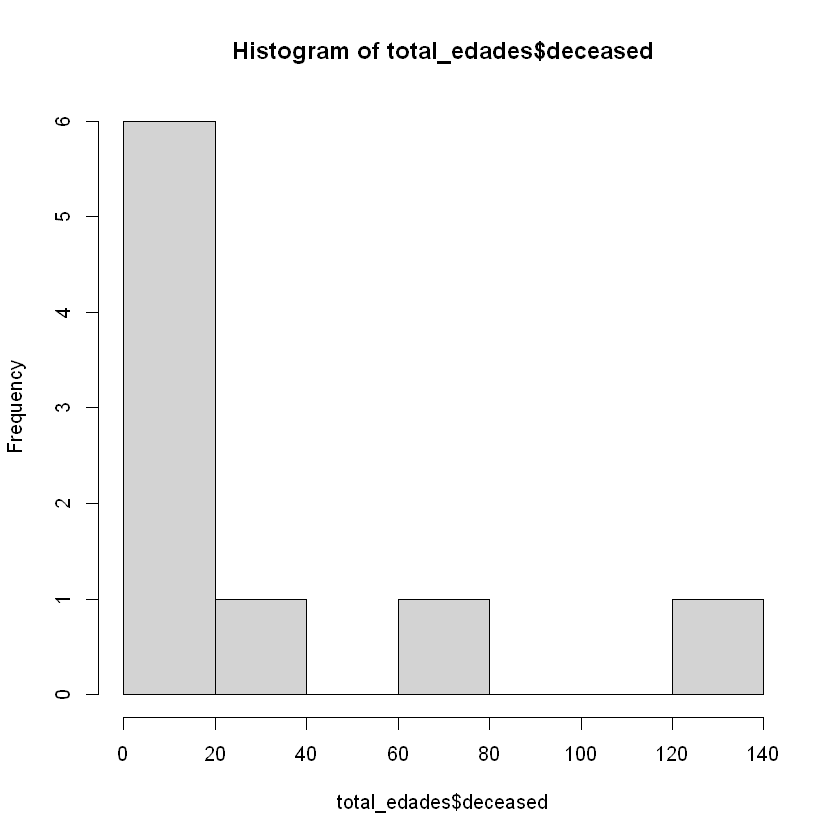

In [59]:
# Creación del Histograma
hist(total_edades$deceased)

Warning message:
"Use of `total_edades$deceased` is discouraged. Use `deceased` instead."
Warning message:
"Use of `total_edades$deceased` is discouraged. Use `deceased` instead."
Warning message:
"Use of `total_edades$deceased` is discouraged. Use `deceased` instead."
Warning message:
"Use of `total_edades$deceased` is discouraged. Use `deceased` instead."
Warning message:
"Use of `total_edades$deceased` is discouraged. Use `deceased` instead."
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



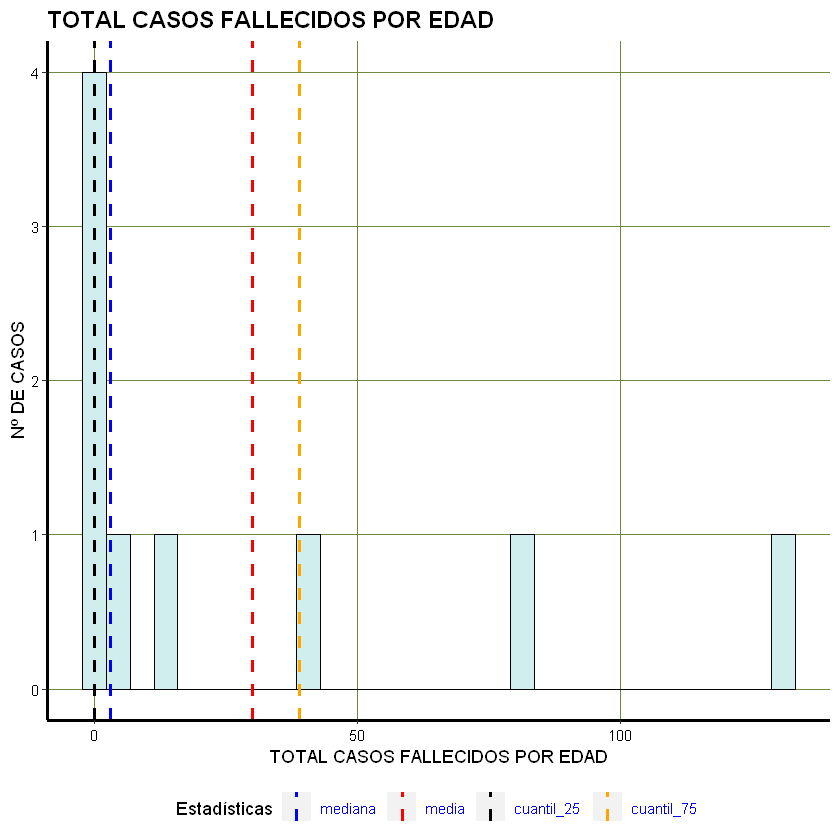

In [60]:
RellenoBarras <- "lightcyan2"
LineaBarras <- "black"

ggplot(aes(x = total_edades$deceased), data = total_edades) + 
      geom_histogram(colour = LineaBarras, fill = RellenoBarras) +
      labs(title="TOTAL CASOS FALLECIDOS POR EDAD") +
      theme(axis.line = element_line(size=1, colour = "black"),
              # Líneas de división mayores de la escala de los ejes del Gráfico de color azul
              panel.grid.major = element_line(colour = "darkolivegreen4"),
              # Líneas de división menores de la escala de los ejes del Gráfico de color blanco
              panel.grid.minor = element_blank(),
              # Bordes dl Gráfico de color Blanco
              panel.border = element_blank(), panel.background = element_blank(),
              # Formato Título: Tamaños 14 y Negrita
              plot.title = element_text(size = 14, face = "bold"),
              # Eje X de color negro. Tamaño fuente 9
              axis.text.x=element_text(colour="black", size = 9),
              # Ponemos la leyenda en la parte infrior
              legend.position="bottom",
              # Texto de la leyenda n azul. Tamaño de fuent 9
              legend.text=element_text(colour="blue",size=9),
              # Eje Y de color negro. Tamaño fuente 9
              axis.text.y=element_text(colour="black", size = 9))+

# Mostrar la Mediana
      geom_vline(aes(xintercept=median(total_edades$deceased),
                 color="mediana"), linetype="dashed",
             size=1) +
# Mostrar la Media
      geom_vline(aes(xintercept = mean(total_edades$deceased),
                 color="media"), linetype="dashed",
             size=1) +
# Mostrar el Cuantil 25
      geom_vline(aes(xintercept = quantile(total_edades$deceased, 0.25),
                 color="cuantil_25"), linetype="dashed",
             size=1) +
# Mostrar el Cuantil 75
      geom_vline(aes(xintercept = quantile(total_edades$deceased, 0.75),
                 color="cuantil_75"), linetype="dashed",
             size=1) +
# Nombre d la Leyenda ·Estadísticas". Colores de las medidas: Medina (Azul), Media (Rojo), Cuantil 25 (Negro)
# y Cuantil 75 (Naranja) 
        scale_color_manual(name = "Estadísticas", values = c(mediana = "blue", media = "red", cuantil_25 = "black", 
                                                     cuantil_75 = "orange"))+
# Texto del eje X "TOTAL CASOS FALLECIDOS" y del eje Y "Nº DE CASOS"
  xlab("TOTAL CASOS FALLECIDOS POR EDAD") + ylab("Nº DE CASOS")

Warning message:
"Use of `total_edades$deceased` is discouraged. Use `deceased` instead."
Warning message:
"Use of `total_edades$deceased` is discouraged. Use `deceased` instead."
Warning message:
"Use of `total_edades$deceased` is discouraged. Use `deceased` instead."
Warning message:
"Use of `total_edades$deceased` is discouraged. Use `deceased` instead."
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



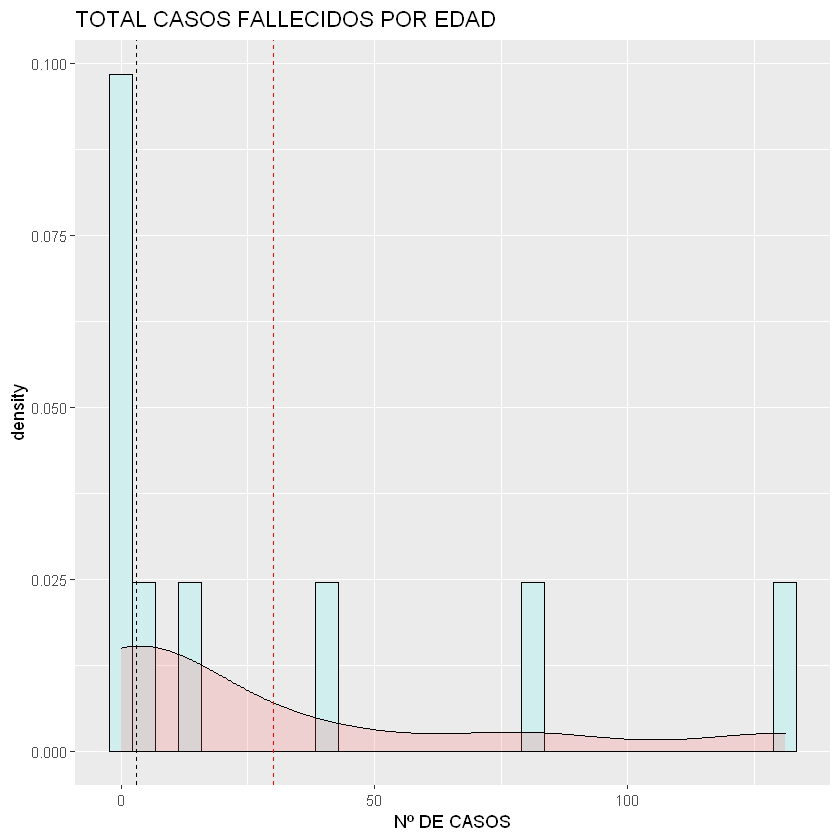

In [61]:
# Histogram with density plot
ggplot(total_edades, aes(x=total_edades$deceased)) + 
     geom_histogram(aes(y=..density..), colour="black", fill="lightcyan2")+
     geom_density(alpha=.2, fill="#FF6666") +
     geom_vline(aes(xintercept=median(total_edades$deceased)),color="black", linetype="dashed") + 
     geom_vline(aes(xintercept=mean(total_edades$deceased)),color="red", linetype="dashed") +
     labs(title="TOTAL CASOS FALLECIDOS POR EDAD") + xlab("Nº DE CASOS")

Warning message:
"Use of `total_edades$deceased` is discouraged. Use `deceased` instead."
Warning message:
"Use of `total_edades$deceased` is discouraged. Use `deceased` instead."
Warning message:
"Use of `total_edades$deceased` is discouraged. Use `deceased` instead."


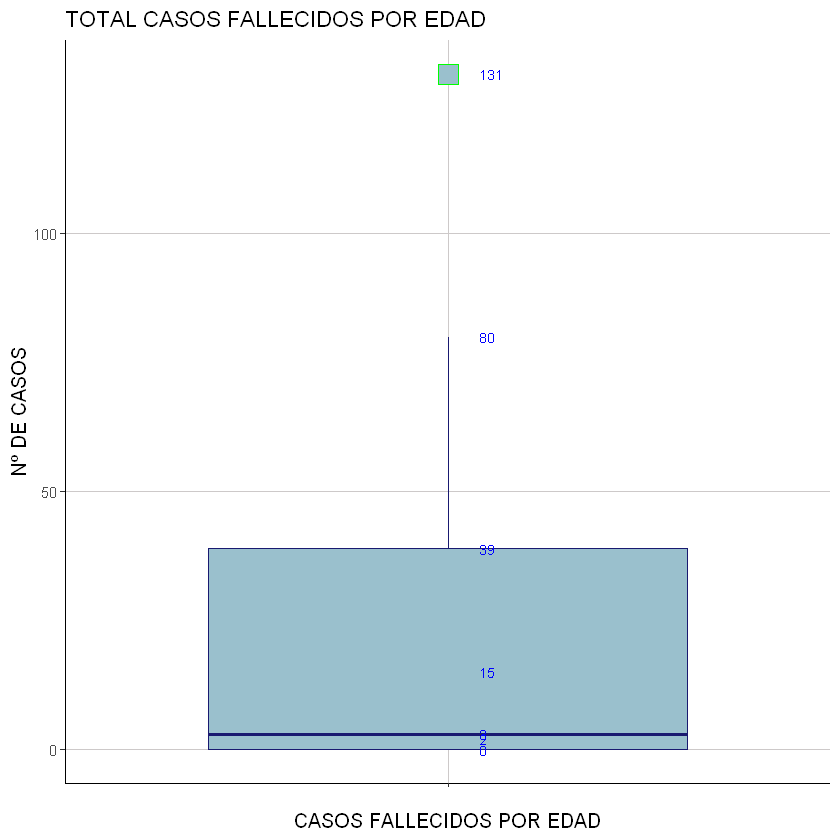

In [62]:
# Creamos dos variables para poner el color de relleno de la caja, y el color del borde de la caja Estas variables
# serán pasadas en la geometría
relleno <- "lightblue3"
linea <- "midnightblue"

bp2 <- ggplot(total_edades, aes(x = "", y = total_edades$deceased)) +
        # Mostramos los Outliers con forma de cuadrado, y de color verde
        geom_boxplot(fill = relleno, colour = linea,outlier.colour = "green", outlier.size = 6,outlier.shape = 22) +
        scale_y_continuous(name = "Nº DE CASOS") + 
        scale_x_discrete(name = "CASOS FALLECIDOS POR EDAD") +
        ggtitle("TOTAL CASOS FALLECIDOS POR EDAD") +
        # Ponemos color Negro a los ejes X e Y
        theme(axis.line.x = element_line(size = 0.5, colour = "black"),
              axis.line.y = element_line(size = 0.5, colour = "black"),
              axis.title = element_text(size = 12),
              # Ponemos título al Gráficco
              legend.text = element_text(size = 9),
              legend.title=element_text(face = "bold", size = 9),
              # Mostramos la escala mayor
              panel.grid.major = element_line(colour = "snow3"),
              panel.grid.minor = element_blank(),
              panel.border = element_blank(),
              #Ponrmos Blanco como color de fondo del Gráfico
              panel.background = element_blank()) +
          # Mostramos los valores de los casos de fallecidos
          geom_text(aes(label=total_edades$deceased),hjust=0,nudge_x=0.05,color="blue",size=3)

bp2

## DATOS DE CASOS POR PROVINCIAS - FICHERO TIMEPROVINCE.CSV

Cargamos los datos de casos agupados por provincias

In [18]:
# importar datos fechas_temp
total_provincias <- read.table('C:\\Users\\pablo\\COVID-19\\datasets\\TotalTimeProvince.csv', skip = 0, header = TRUE, sep =",")
#total_provincias <- arrange(total_provincias, -total_provincias$confirmed) # Orden inverso
head(total_provincias,18)

,ï..province,confirmed,released,deceased
,<chr>,<int>,<int>,<int>
1,Seoul,861,627,4
2,Busan,147,138,3
3,Daegu,6883,6607,185
4,Incheon,206,94,0
5,Gwangju,32,30,0
6,Daejeon,46,42,1
7,Ulsan,52,45,1
8,Sejong,47,47,0
9,Gyeonggi-do,840,650,19


Ver la cantidad de valores NaN en las columnas

### ESTADÍSTICAS BÁSICAS

In [20]:
summarise_all(total_provincias, funs(sum(is.na(.))))

ERROR: Error in summarise_all(total_provincias, funs(sum(is.na(.)))): no se pudo encontrar la función "summarise_all"


In [21]:
summary(total_provincias)

 ï..province          confirmed         released         deceased     
 Length:17          Min.   :  15.0   Min.   :  13.0   Min.   :  0.00  
 Class :character   1st Qu.:  46.0   1st Qu.:  42.0   1st Qu.:  0.00  
 Mode  :character   Median :  60.0   Median :  50.0   Median :  0.00  
                    Mean   : 643.2   Mean   : 587.4   Mean   : 15.88  
                    3rd Qu.: 206.0   3rd Qu.: 142.0   3rd Qu.:  3.00  
                    Max.   :6883.0   Max.   :6607.0   Max.   :185.00  

In [22]:
# Función creada por el usuario para el cálculo de la Moda
moda <- function(v) {
uniqv <- unique(v)
uniqv[which.max(tabulate(match(v, uniqv)))]}

### ANÁLISIS CAMPO **CONFIRMED**

In [23]:
# Cálculo de la Moda
moda(total_provincias$confirmed)

[1] 861

La Media > Mediana

In [24]:
quantile(total_provincias$confirmed, 0.25)
quantile(total_provincias$confirmed, 0.75)

25% 
 46

75% 
206

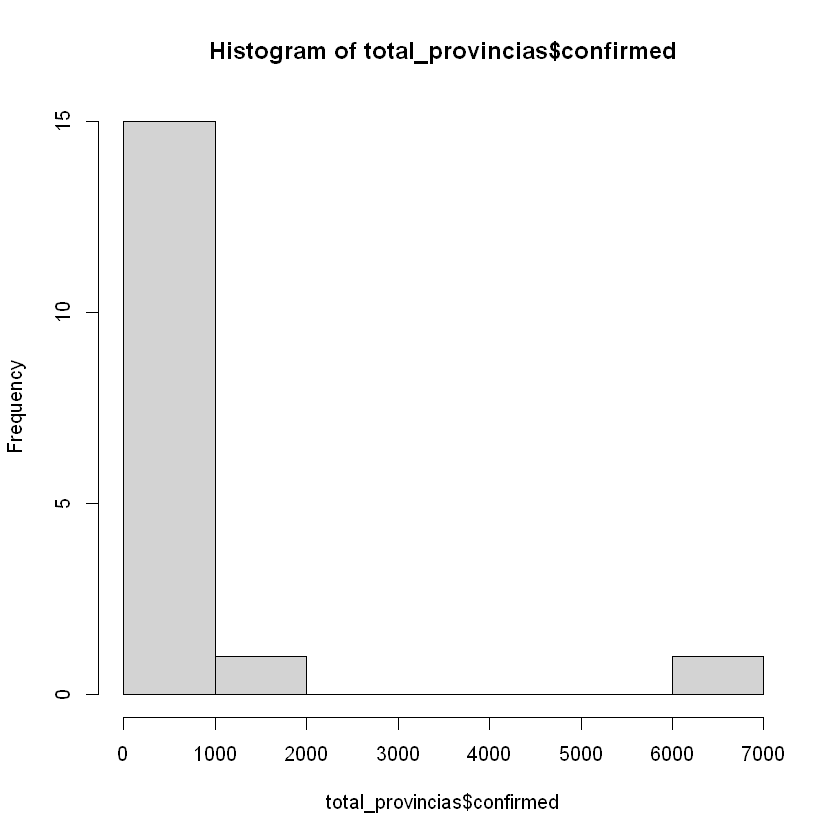

In [25]:
# Creación del Histograma
hist(total_provincias$confirmed)

Warning message:
"Use of `total_provincias$confirmed` is discouraged. Use `confirmed` instead."
Warning message:
"Use of `total_provincias$confirmed` is discouraged. Use `confirmed` instead."
Warning message:
"Use of `total_provincias$confirmed` is discouraged. Use `confirmed` instead."
Warning message:
"Use of `total_provincias$confirmed` is discouraged. Use `confirmed` instead."
Warning message:
"Use of `total_provincias$confirmed` is discouraged. Use `confirmed` instead."
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



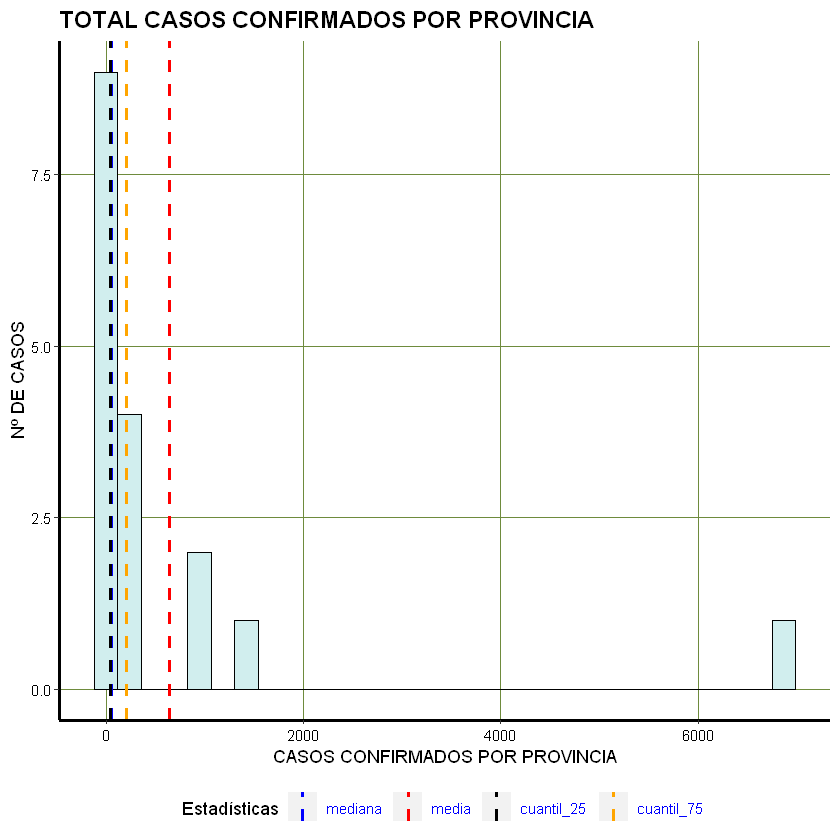

In [69]:
RellenoBarras <- "lightcyan2"
LineaBarras <- "black"

ggplot(aes(x = total_provincias$confirmed), data = total_provincias) + 
      geom_histogram(colour = LineaBarras, fill = RellenoBarras) +
      labs(title="TOTAL CASOS CONFIRMADOS POR PROVINCIA") +
      theme(axis.line = element_line(size=1, colour = "black"),
              # Líneas de división mayores de la escala de los ejes del Gráfico de color azul
              panel.grid.major = element_line(colour = "darkolivegreen4"),
              # Líneas de división menores de la escala de los ejes del Gráfico de color blanco
              panel.grid.minor = element_blank(),
              # Bordes dl Gráfico de color Blanco
              panel.border = element_blank(), panel.background = element_blank(),
              # Formato Título: Tamaños 14 y Negrita
              plot.title = element_text(size = 14, face = "bold"),
              # Eje X de color negro. Tamaño fuente 9
              axis.text.x=element_text(colour="black", size = 9),
              # Ponemos la leyenda en la parte infrior
              legend.position="bottom",
              # Texto de la leyenda n azul. Tamaño de fuent 9
              legend.text=element_text(colour="blue",size=9),
              # Eje Y de color negro. Tamaño fuente 9
              axis.text.y=element_text(colour="black", size = 9))+

# Mostrar la Mediana
      geom_vline(aes(xintercept=median(total_provincias$confirmed),
                 color="mediana"), linetype="dashed",
             size=1) +
# Mostrar la Media
      geom_vline(aes(xintercept = mean(total_provincias$confirmed),
                 color="media"), linetype="dashed",
             size=1) +
# Mostrar el Cuantil 25
      geom_vline(aes(xintercept = quantile(total_provincias$confirmed, 0.25),
                 color="cuantil_25"), linetype="dashed",
             size=1) +
# Mostrar el Cuantil 75
      geom_vline(aes(xintercept = quantile(total_provincias$confirmed, 0.75),
                 color="cuantil_75"), linetype="dashed",
             size=1) +
# Nombre d la Leyenda ·Estadísticas". Colores de las medidas: Medina (Azul), Media (Rojo), Cuantil 25 (Negro)
# y Cuantil 75 (Naranja) 
        scale_color_manual(name = "Estadísticas", values = c(mediana = "blue", media = "red", cuantil_25 = "black", 
                                                     cuantil_75 = "orange"))+
# Texto del eje X "TOTAL CASOS CONFIRMADOS POR PROVINCIA" y del eje Y "Nº DE CASOS"
  xlab("CASOS CONFIRMADOS POR PROVINCIA") + ylab("Nº DE CASOS")

Warning message:
"Use of `total_provincias$confirmed` is discouraged. Use `confirmed` instead."
Warning message:
"Use of `total_provincias$confirmed` is discouraged. Use `confirmed` instead."
Warning message:
"Use of `total_provincias$confirmed` is discouraged. Use `confirmed` instead."
Warning message:
"Use of `total_provincias$confirmed` is discouraged. Use `confirmed` instead."
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



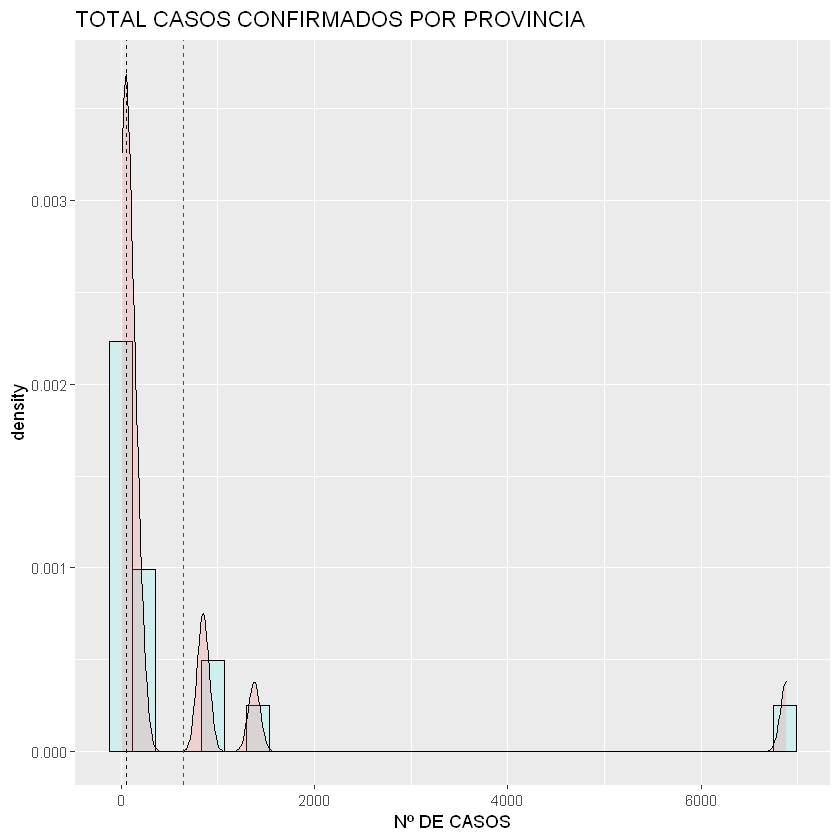

In [71]:
# Histogram with density plot
ggplot(total_provincias, aes(x=total_provincias$confirmed)) + 
     geom_histogram(aes(y=..density..), colour="black", fill="lightcyan2")+
     geom_density(alpha=.2, fill="#FF6666") +
     geom_vline(aes(xintercept=median(total_provincias$confirmed)),color="black", linetype="dashed") + 
     geom_vline(aes(xintercept=mean(total_provincias$confirmed)),color="red", linetype="dashed") +
     labs(title="TOTAL CASOS CONFIRMADOS POR PROVINCIA") + xlab("Nº DE CASOS")

Esta misma información también se puede visualizar con un boxplot

Vamos a ver los elementos de un Boxplot, y que información nos dan:
- La línea inferior de la caja es el Cuantil 25
- La línea superior de la caja es el Cuantil 75
- La línea interior de la caja es la mediana. Al no estar en el centro de la caja, y más cerca de la parte inferior de la caja, no es simétrica, y nos indica que hay un sesgo hacía la derecha, es decir, la distribución teien una pequeña cola hacia la derecha.
- Las líneas verticales, arriba y abajo de la caja, son los bigotes, y se extienden hasta los valores máximo y mínimo de los valores o hasta 1,5 veces el RIC (rango intercuartílico)- Cuando los datos se extienden más allá de esto, significa que hay valores atípicos en la serie y entonces hay que calcular los límites superior e inferior, Li y Ls. Para ello, se consideran atípicos los valores inferiores a Q1–1.5·RIC o superiores a Q3+1.5·RIC.
- Los puntos que vemos fuera de los bigotes, son datos atípicos

Warning message:
"Use of `total_provincias$confirmed` is discouraged. Use `confirmed` instead."
Warning message:
"Use of `total_provincias$confirmed` is discouraged. Use `confirmed` instead."
Warning message:
"Use of `total_provincias$confirmed` is discouraged. Use `confirmed` instead."


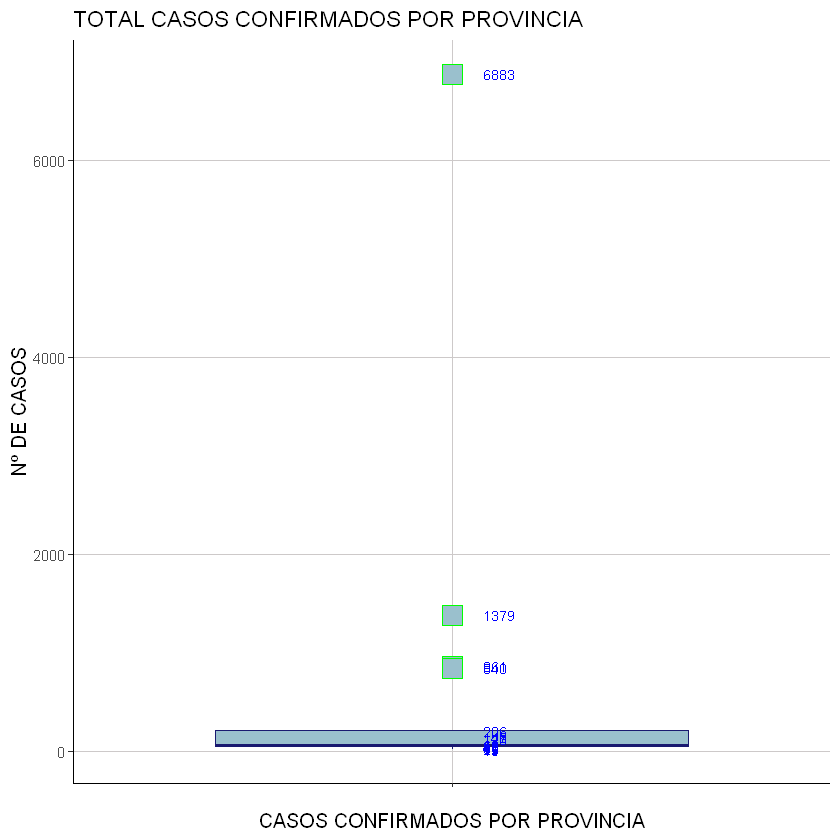

In [30]:
# Creamos dos variables para poner el color de relleno de la caja, y el color del borde de la caja Estas variables
# serán pasadas en la geometría
relleno <- "lightblue3"
linea <- "midnightblue"

bp2 <- ggplot(total_provincias, aes(x = "", y = total_provincias$confirmed)) +
        # Mostramos los Outliers con forma de cuadrado, y de color verde
        geom_boxplot(fill = relleno, colour = linea,outlier.colour = "green", outlier.size = 6,outlier.shape = 22) +
        scale_y_continuous(name = "Nº DE CASOS") + 
        scale_x_discrete(name = "CASOS CONFIRMADOS POR PROVINCIA") +
        ggtitle("TOTAL CASOS CONFIRMADOS POR PROVINCIA") +
        # Ponemos color Negro a los ejes X e Y
        theme(axis.line.x = element_line(size = 0.5, colour = "black"),
              axis.line.y = element_line(size = 0.5, colour = "black"),
              axis.title = element_text(size = 12),
              # Ponemos título al Gráficco
              legend.text = element_text(size = 9),
              legend.title=element_text(face = "bold", size = 9),
              # Mostramos la escala mayor
              panel.grid.major = element_line(colour = "snow3"),
              panel.grid.minor = element_blank(),
              panel.border = element_blank(),
              #Ponrmos Blanco como color de fondo del Gráfico
              panel.background = element_blank()) +
          # Mostramos los valores de los Anchos de Sépalo
          geom_text(aes(label=total_provincias$confirmed),hjust=0,nudge_x=0.05,color="blue",size=3)

bp2

Si analizamos el Histograma y el Boxplot, podemos ver que hay varios valores atípicos, sobre todo uno: **6883**, que corresponde  la provincia de **Daegu**. Este valor se pude decir que es un Outlier, ya que está fuera del alcance de los bigotes del Boxplot.

A partir de todo lo que hemos analizado, podemos sacar diferentes conclusiones sobre la forma de la distribución:

- Conclusión 1: gracias al histograma, y aunque la mediana está muy cercana a la media, vemos que la distribución está sesgada hacía la
derecha, es decir, existe una pequeña cola a la derecha, por lo tanto, no tenemos una distribución normal o simétrica. Esto podremos
analizarlo en detalle cuando veamos las medidas de simetría.
- Conclusión 2: los cuantiles 25 y 75, no están a la misma distancia de la mediana (Ver BoxPlot). Hay una mayor distancia entre el cuantil 75 y la
mediana, que entre el cuantil 25 y la mediana (Ver BoxPlot). Esto último puede significar que hay un mayor apelotonamiento de los datos.
en esta zona.
- Conclusión 3: debido a todo esto parece que estemos ante una asimetría positiva.
- Conclusión 4: tenemos un dato atípico (outliers) que, si lo eliminaremos, la distribución podría ser simétrica. Esto será analizado más adelante.


# Medidas de Dispersión

Con la Medidas de Dispersión, podremos analizar la dispersión de los datos, es decir, vamos a medir lo lejos o cerca que están los valores respecto a la media.

Varianza: La varianza nos va a servir para determinar la dispersión de los valores de la variable alrededor de la media. Así, si los valores están alejados de su valor medio, la varianza será grande y si están muy próximos a ella, la varianza será pequeña y podremos intuir que las medidas están concentradas alrededor de la media.

De la misma manera que ocurre con la media es muy sensible de datos extremos y cuanto más se acerque su valor a cero podemos deducir que los datos están más concentrados alrededor de la media de la variable aleatoria

In [28]:
# Cálculo de la varianza
var(total_provincias$confirmed)

[1] 2738011

In [29]:
# Cálculo de la desviación Típica
sd(total_provincias$confirmed)

[1] 1654.694

# Medidas de Forma

La asimetría será un indicador sobre el aspecto que tiene una distribución utilizando como eje el valor que pasa por la media, podemos verlo como una manera de matematizar algo que podríamos analizar dibujando las frecuencias de la variable. Diremos que una distribución es simétrica; si a misma distancia de la media, a ambos lados, las frecuencias son parecidas. El ejemplo más evidente de distribución simétrica sería la normal.

En el caso en el que no exista simetría, las asimetrías las podremos clasificar en dos grupos:

- Asimetría positiva: si la cola a la derecha de la media es más larga que la izquierda.
- Asimetría negativa: si la cola a la izquierda de la media es más larga que a la derecha.

Coeficiente de Simetría: La primera medida de forma que vamos a ver será el coeficiente de simetría, que nos dará información sobre si la distribución está centrada o si presenta colas a alguno de los dos lados:

In [79]:
# install.packages("e1071")
library(e1071)

In [31]:
# Cálculo del Coeficiente de Simetría
skewness(total_provincias$confirmed)

[1] 3.127844

Como era de esperar, tenemos simetría > 0, lo cual nos informa de que la distribución presenta un sesgo hacía la derecha. ASIMETRIA POSITIVA

Nota: en una Distribución Normal, tendríamos un valor 0 o cercano al 0.

Vamos a hacer el test de Shapiro-Wilk, buscando un valor p mayor a 0,05

In [32]:
#Prueba de Shapiro Wilk (muestras pequeñas)
shapiro.test(total_provincias$confirmed)


	Shapiro-Wilk normality test

data:  total_provincias$confirmed
W = 0.4173, p-value = 2.777e-07


Vemos que p-value < 0. Lo cual también corrobora prácticamente la asimetría

Kurtosis: La curtosis (o apuntamiento) es una medida de forma que mide cuán escarpada o achatada está una curva o distribución. Mide el apuntamiento que presenta la distribución alrededor de la media. Este coeficiente indica la cantidad de datos que hay cercanos a la media, de manera que a mayor grado de curtosis, más escarpada (o apuntada) será la forma de la curva

In [33]:
# Cálculo de la Kurtosis
kurtosis(total_provincias$confirmed)

[1] 8.90876

Si el coeficiente es positivo, la distribución se llama leptocúrtica, más puntiaguda. Hay una mayor concentración de los datos en torno a la media

### ANÁLISIS CAMPO **DECEASED**

In [63]:
# Cálculo de la Moda
moda(total_provincias$deceased)

[1] 0

La Media > Mediana > Moda

In [66]:
quantile(total_provincias$deceased, 0.25)
quantile(total_provincias$deceased, 0.75)

25% 
  0

75% 
  3

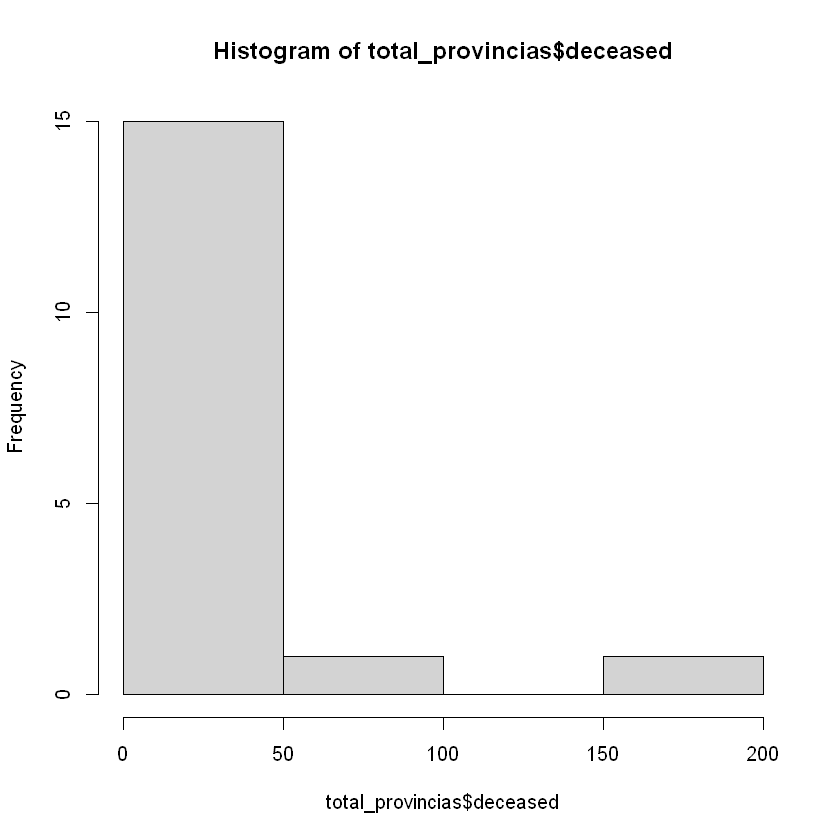

In [65]:
# Creación del Histograma
hist(total_provincias$deceased)

Warning message:
"Use of `total_provincias$deceased` is discouraged. Use `deceased` instead."
Warning message:
"Use of `total_provincias$deceased` is discouraged. Use `deceased` instead."
Warning message:
"Use of `total_provincias$deceased` is discouraged. Use `deceased` instead."
Warning message:
"Use of `total_provincias$deceased` is discouraged. Use `deceased` instead."
Warning message:
"Use of `total_provincias$deceased` is discouraged. Use `deceased` instead."
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



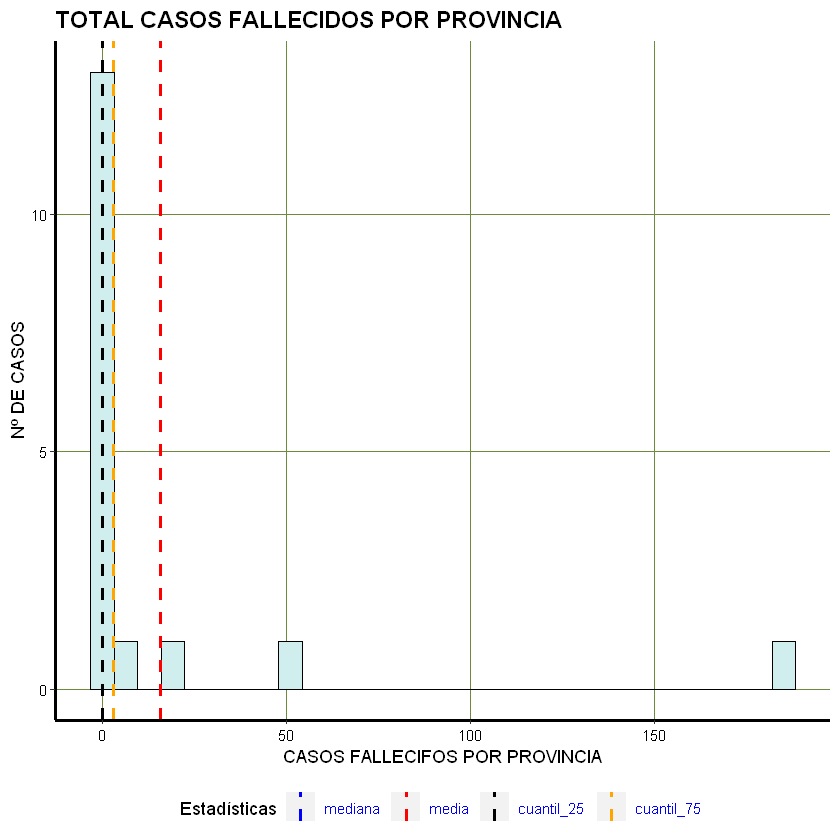

In [67]:
RellenoBarras <- "lightcyan2"
LineaBarras <- "black"

ggplot(aes(x = total_provincias$deceased), data = total_provincias) + 
      geom_histogram(colour = LineaBarras, fill = RellenoBarras) +
      labs(title="TOTAL CASOS FALLECIDOS POR PROVINCIA") +
      theme(axis.line = element_line(size=1, colour = "black"),
              # Líneas de división mayores de la escala de los ejes del Gráfico de color azul
              panel.grid.major = element_line(colour = "darkolivegreen4"),
              # Líneas de división menores de la escala de los ejes del Gráfico de color blanco
              panel.grid.minor = element_blank(),
              # Bordes dl Gráfico de color Blanco
              panel.border = element_blank(), panel.background = element_blank(),
              # Formato Título: Tamaños 14 y Negrita
              plot.title = element_text(size = 14, face = "bold"),
              # Eje X de color negro. Tamaño fuente 9
              axis.text.x=element_text(colour="black", size = 9),
              # Ponemos la leyenda en la parte infrior
              legend.position="bottom",
              # Texto de la leyenda n azul. Tamaño de fuent 9
              legend.text=element_text(colour="blue",size=9),
              # Eje Y de color negro. Tamaño fuente 9
              axis.text.y=element_text(colour="black", size = 9))+

# Mostrar la Mediana
      geom_vline(aes(xintercept=median(total_provincias$deceased),
                 color="mediana"), linetype="dashed",
             size=1) +
# Mostrar la Media
      geom_vline(aes(xintercept = mean(total_provincias$deceased),
                 color="media"), linetype="dashed",
             size=1) +
# Mostrar el Cuantil 25
      geom_vline(aes(xintercept = quantile(total_provincias$deceased, 0.25),
                 color="cuantil_25"), linetype="dashed",
             size=1) +
# Mostrar el Cuantil 75
      geom_vline(aes(xintercept = quantile(total_provincias$deceased, 0.75),
                 color="cuantil_75"), linetype="dashed",
             size=1) +
# Nombre d la Leyenda ·Estadísticas". Colores de las medidas: Medina (Azul), Media (Rojo), Cuantil 25 (Negro)
# y Cuantil 75 (Naranja) 
        scale_color_manual(name = "Estadísticas", values = c(mediana = "blue", media = "red", cuantil_25 = "black", 
                                                     cuantil_75 = "orange"))+
# Texto del eje X "TOTAL CASOS FALLECIDOS POR PROVINCIA" y del eje Y "Nº DE CASOS"
  xlab("CASOS FALLECIFOS POR PROVINCIA") + ylab("Nº DE CASOS")

Warning message:
"Use of `total_provincias$deceased` is discouraged. Use `deceased` instead."
Warning message:
"Use of `total_provincias$deceased` is discouraged. Use `deceased` instead."
Warning message:
"Use of `total_provincias$deceased` is discouraged. Use `deceased` instead."
Warning message:
"Use of `total_provincias$deceased` is discouraged. Use `deceased` instead."
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



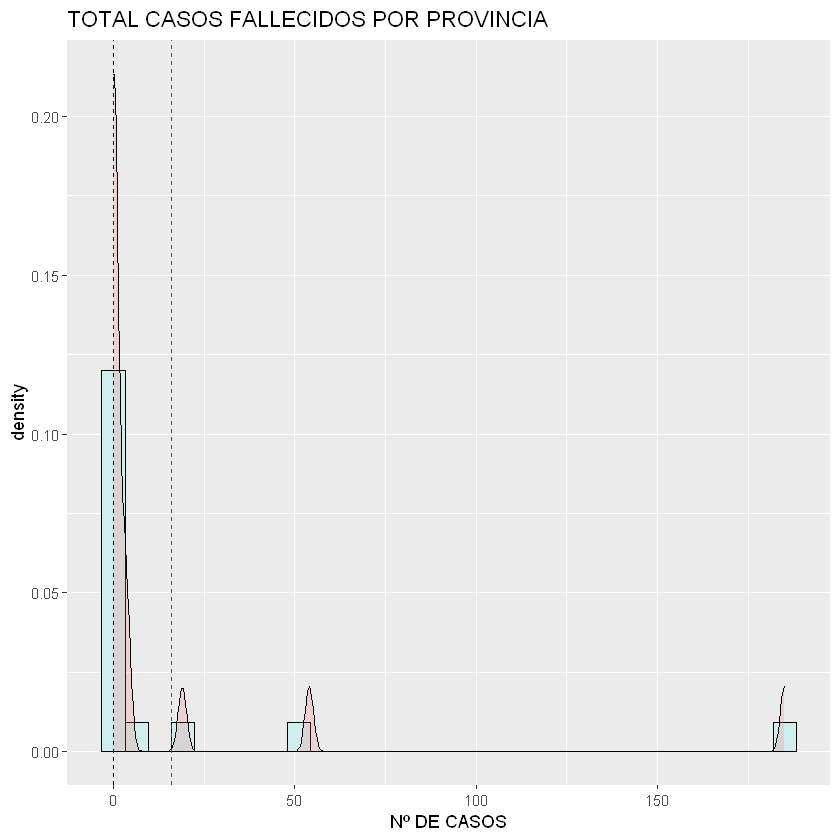

In [70]:
# Histogram with density plot
ggplot(total_provincias, aes(x=total_provincias$deceased)) + 
     geom_histogram(aes(y=..density..), colour="black", fill="lightcyan2")+
     geom_density(alpha=.2, fill="#FF6666") +
     geom_vline(aes(xintercept=median(total_provincias$deceased)),color="black", linetype="dashed") + 
     geom_vline(aes(xintercept=mean(total_provincias$deceased)),color="red", linetype="dashed") +
     labs(title="TOTAL CASOS FALLECIDOS POR PROVINCIA") + xlab("Nº DE CASOS")

Warning message:
"Use of `total_provincias$deceased` is discouraged. Use `deceased` instead."
Warning message:
"Use of `total_provincias$deceased` is discouraged. Use `deceased` instead."
Warning message:
"Use of `total_provincias$deceased` is discouraged. Use `deceased` instead."


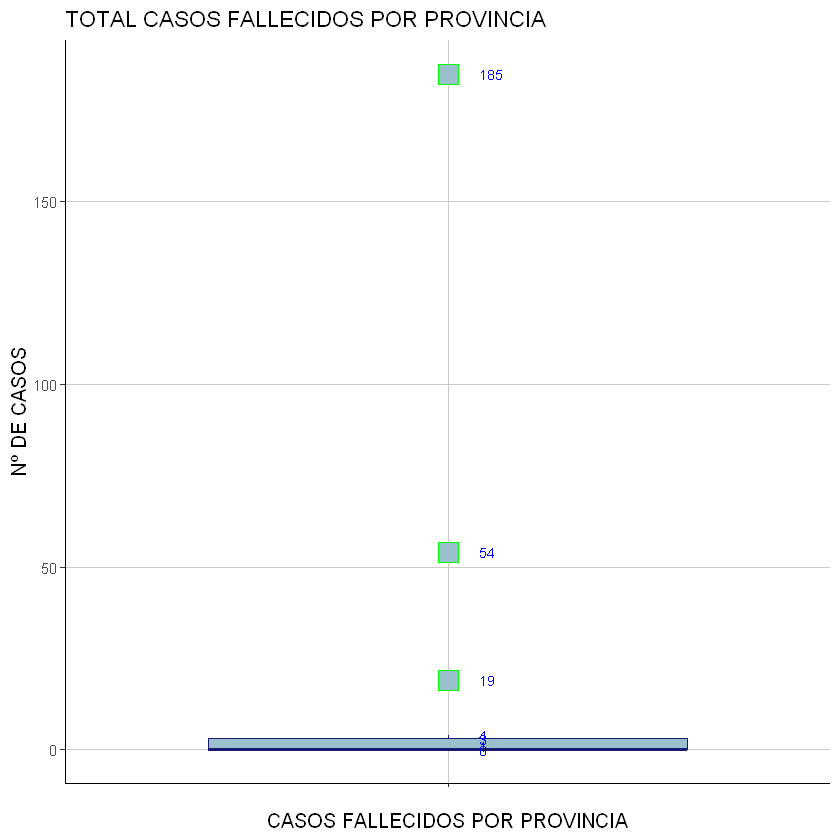

In [72]:
# Creamos dos variables para poner el color de relleno de la caja, y el color del borde de la caja Estas variables
# serán pasadas en la geometría
relleno <- "lightblue3"
linea <- "midnightblue"

bp2 <- ggplot(total_provincias, aes(x = "", y = total_provincias$deceased)) +
        # Mostramos los Outliers con forma de cuadrado, y de color verde
        geom_boxplot(fill = relleno, colour = linea,outlier.colour = "green", outlier.size = 6,outlier.shape = 22) +
        scale_y_continuous(name = "Nº DE CASOS") + 
        scale_x_discrete(name = "CASOS FALLECIDOS POR PROVINCIA") +
        ggtitle("TOTAL CASOS FALLECIDOS POR PROVINCIA") +
        # Ponemos color Negro a los ejes X e Y
        theme(axis.line.x = element_line(size = 0.5, colour = "black"),
              axis.line.y = element_line(size = 0.5, colour = "black"),
              axis.title = element_text(size = 12),
              # Ponemos título al Gráficco
              legend.text = element_text(size = 9),
              legend.title=element_text(face = "bold", size = 9),
              # Mostramos la escala mayor
              panel.grid.major = element_line(colour = "snow3"),
              panel.grid.minor = element_blank(),
              panel.border = element_blank(),
              #Ponrmos Blanco como color de fondo del Gráfico
              panel.background = element_blank()) +
          # Mostramos los valores de los Anchos de Sépalo
          geom_text(aes(label=total_provincias$deceased),hjust=0,nudge_x=0.05,color="blue",size=3)

bp2

## DATOS DE CASOS POR TEST REALIZADOS - FICHERO TIME.CSV

Cargamos los datos de casos agupados por Test realizados por Mes

In [37]:
# importar datos fechas_temp
total_test <- read.table('C:\\Users\\pablo\\COVID-19\\datasets\\TotalTimeMonth.csv', skip = 0, header = TRUE, sep =",")
head(total_test)

,ï..month,test,negative,confirmed,released,deceased
,<chr>,<int>,<int>,<int>,<int>,<int>
1,January,312,313,314,315,316
2,February,93743,55410,2836,-287,-299
3,March,316509,328163,6636,5380,145
4,April,209317,216596,979,3651,85
5,May,290941,275578,703,1346,23


Ver la cantidad de valores NaN en las columnas

In [41]:
summarise_all(total_test, funs(sum(is.na(.))))

ï..month,test,negative,confirmed,released,deceased
0,0,0,0,0,0


# Medidas de Tendencia Central

In [38]:
summary(total_test)

   ï..month              test           negative        confirmed   
 Length:5           Min.   :   312   Min.   :   313   Min.   : 314  
 Class :character   1st Qu.: 93743   1st Qu.: 55410   1st Qu.: 703  
 Mode  :character   Median :209317   Median :216596   Median : 979  
                    Mean   :182164   Mean   :175212   Mean   :2294  
                    3rd Qu.:290941   3rd Qu.:275578   3rd Qu.:2836  
                    Max.   :316509   Max.   :328163   Max.   :6636  
    released       deceased   
 Min.   :-287   Min.   :-299  
 1st Qu.: 315   1st Qu.:  23  
 Median :1346   Median :  85  
 Mean   :2081   Mean   :  54  
 3rd Qu.:3651   3rd Qu.: 145  
 Max.   :5380   Max.   : 316  

In [39]:
# Función creada por el usuario para el cálculo de la Moda
moda <- function(v) {
uniqv <- unique(v)
uniqv[which.max(tabulate(match(v, uniqv)))]}

In [40]:
# Cálculo de la Moda
moda(total_test$test)

[1] 312

In [41]:
quantile(total_test$test, 0.25)
quantile(total_test$test, 0.75)

25% 
93743

75% 
290941

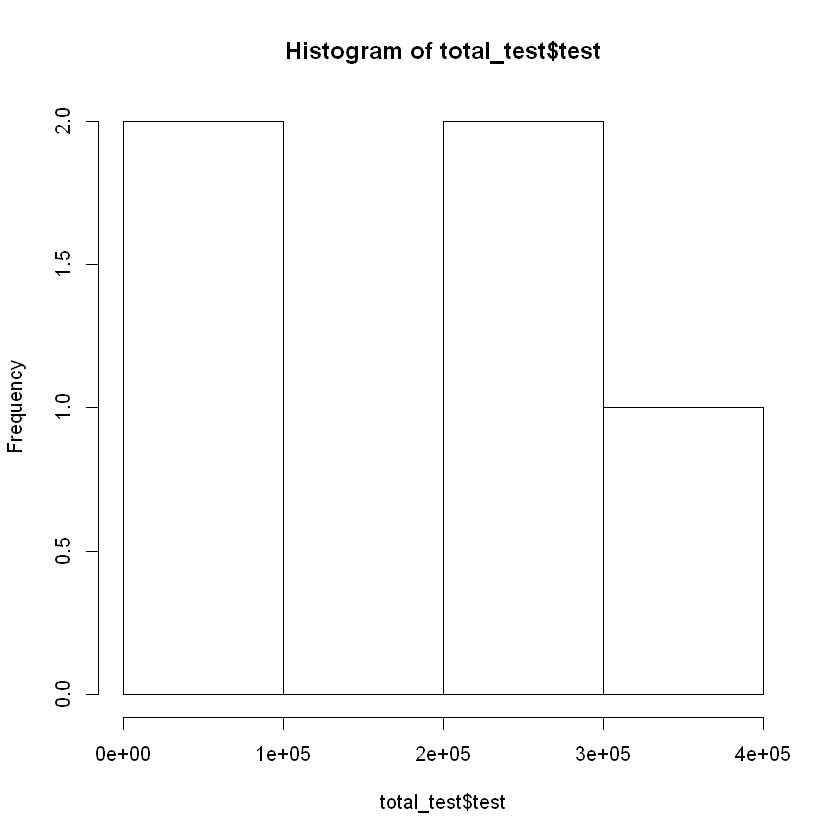

In [44]:
# Creación del Histograma
hist(total_test$test)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


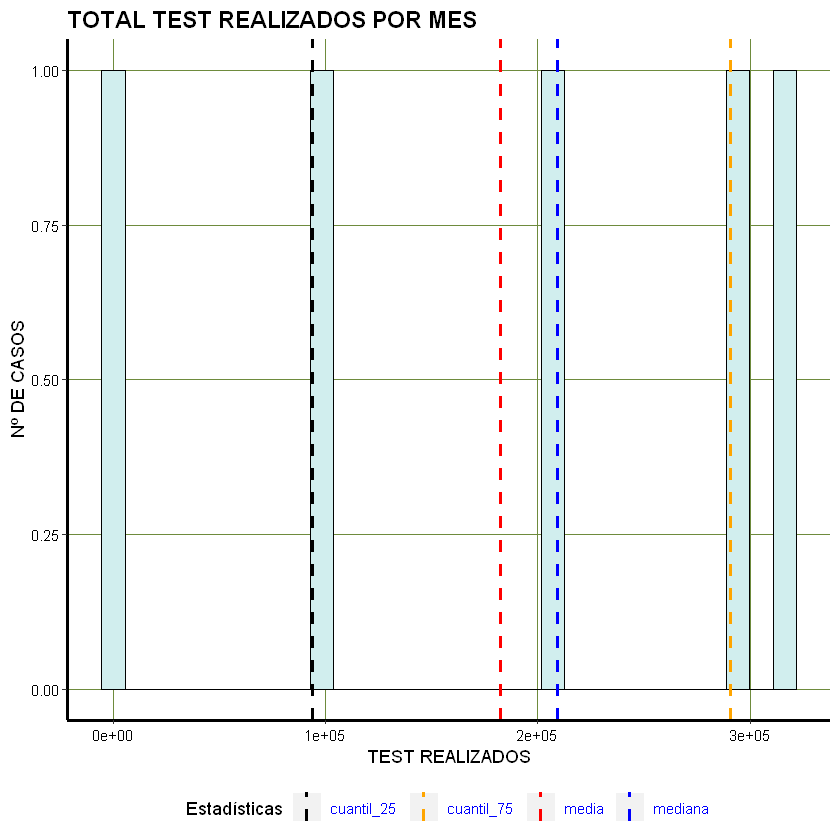

In [45]:
RellenoBarras <- "lightcyan2"
LineaBarras <- "black"

ggplot(aes(x = total_test$test), data = total_test) + 
      geom_histogram(colour = LineaBarras, fill = RellenoBarras) +
      labs(title="TOTAL TEST REALIZADOS POR MES") +
      theme(axis.line = element_line(size=1, colour = "black"),
              # Líneas de división mayores de la escala de los ejes del Gráfico de color azul
              panel.grid.major = element_line(colour = "darkolivegreen4"),
              # Líneas de división menores de la escala de los ejes del Gráfico de color blanco
              panel.grid.minor = element_blank(),
              # Bordes dl Gráfico de color Blanco
              panel.border = element_blank(), panel.background = element_blank(),
              # Formato Título: Tamaños 14 y Negrita
              plot.title = element_text(size = 14, face = "bold"),
              # Eje X de color negro. Tamaño fuente 9
              axis.text.x=element_text(colour="black", size = 9),
              # Ponemos la leyenda en la parte infrior
              legend.position="bottom",
              # Texto de la leyenda n azul. Tamaño de fuent 9
              legend.text=element_text(colour="blue",size=9),
              # Eje Y de color negro. Tamaño fuente 9
              axis.text.y=element_text(colour="black", size = 9))+

# Mostrar la Mediana
      geom_vline(aes(xintercept=median(total_test$test),
                 color="mediana"), linetype="dashed",
             size=1) +
# Mostrar la Media
      geom_vline(aes(xintercept = mean(total_test$test),
                 color="media"), linetype="dashed",
             size=1) +
# Mostrar el Cuantil 25
      geom_vline(aes(xintercept = quantile(total_test$test, 0.25),
                 color="cuantil_25"), linetype="dashed",
             size=1) +
# Mostrar el Cuantil 75
      geom_vline(aes(xintercept = quantile(total_test$test, 0.75),
                 color="cuantil_75"), linetype="dashed",
             size=1) +
# Nombre d la Leyenda ·Estadísticas". Colores de las medidas: Medina (Azul), Media (Rojo), Cuantil 25 (Negro)
# y Cuantil 75 (Naranja) 
        scale_color_manual(name = "Estadísticas", values = c(mediana = "blue", media = "red", cuantil_25 = "black", 
                                                     cuantil_75 = "orange"))+
# Texto del eje X "TOTAL CASOS CONFIMADOS POR PROVINCIA" y del eje Y "Nº DE CASOS"
  xlab("TEST REALIZADOS") + ylab("Nº DE CASOS")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


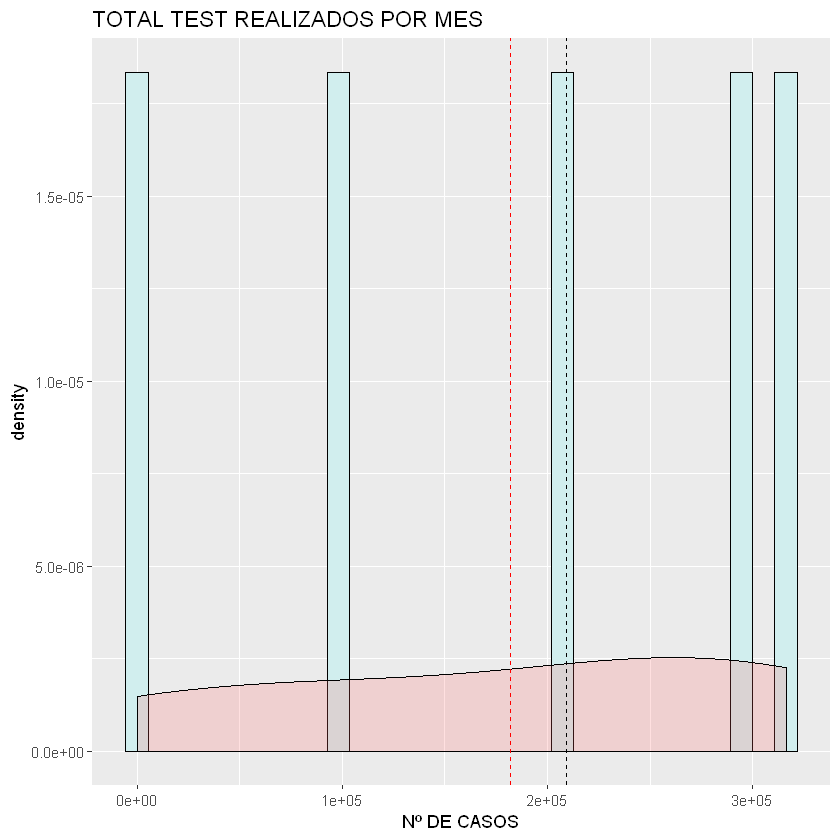

In [46]:
# Histogram with density plot
ggplot(total_test, aes(x=total_test$test)) + 
     geom_histogram(aes(y=..density..), colour="black", fill="lightcyan2")+
     geom_density(alpha=.2, fill="#FF6666") +
     geom_vline(aes(xintercept=median(total_test$test)),color="black", linetype="dashed") + 
     geom_vline(aes(xintercept=mean(total_test$test)),color="red", linetype="dashed") +
     labs(title="TOTAL TEST REALIZADOS POR MES") + xlab("Nº DE CASOS")

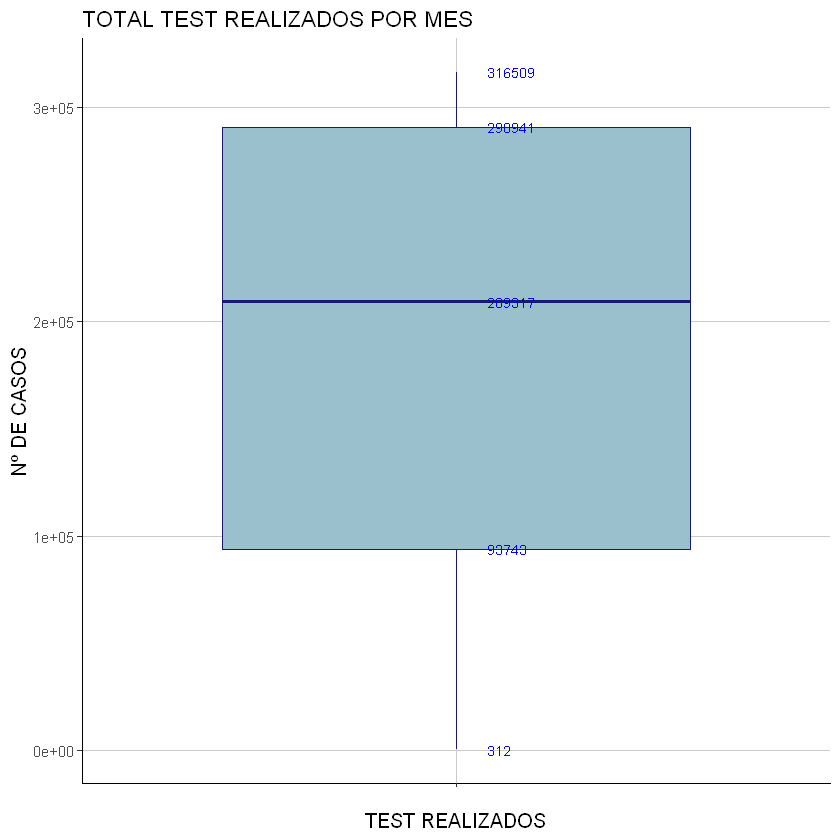

In [30]:
# Creamos dos variables para poner el color de relleno de la caja, y el color del borde de la caja Estas variables
# serán pasadas en la geometría
relleno <- "lightblue3"
linea <- "midnightblue"

bp2 <- ggplot(total_test, aes(x = "", y = total_test$test)) +
        # Mostramos los Outliers con forma de cuadrado, y de color verde
        geom_boxplot(fill = relleno, colour = linea,outlier.colour = "green", outlier.size = 6,outlier.shape = 22) +
        scale_y_continuous(name = "Nº DE CASOS") + 
        scale_x_discrete(name = "TEST REALIZADOS") +
        ggtitle("TOTAL TEST REALIZADOS POR MES") +
        # Ponemos color Negro a los ejes X e Y
        theme(axis.line.x = element_line(size = 0.5, colour = "black"),
              axis.line.y = element_line(size = 0.5, colour = "black"),
              axis.title = element_text(size = 12),
              # Ponemos título al Gráficco
              legend.text = element_text(size = 9),
              legend.title=element_text(face = "bold", size = 9),
              # Mostramos la escala mayor
              panel.grid.major = element_line(colour = "snow3"),
              panel.grid.minor = element_blank(),
              panel.border = element_blank(),
              #Ponrmos Blanco como color de fondo del Gráfico
              panel.background = element_blank()) +
          # Mostramos los valores de los Anchos de Sépalo
          geom_text(aes(label=total_test$test),hjust=0,nudge_x=0.05,color="blue",size=3)

bp2

# Medidas de Dispersión

In [31]:
# Cálculo de la varianza
var(total_test$test)

[1] 17876680827

In [32]:
# Cálculo de la desviación Típica
sd(total_test$test)

[1] 133703.7

# Medidas de Forma

In [33]:
# install.packages("e1071")
library(e1071)

In [34]:
# Cálculo del Coeficiente de Simetría
skewness(total_test$test)

[1] -0.248802

Tenemos simetría <= 0 aunque muy cercana al 0, lo cual nos informa de que la distribución, sería practicamnt normal, con un pequeño sesgo.

In [35]:
#Prueba de Shapiro Wilk (muestras pequeñas)
shapiro.test(total_test$test)


	Shapiro-Wilk normality test

data:  total_test$test
W = 0.92909, p-value = 0.5902


In [47]:
# Cálculo de la Kurtosis
kurtosis(total_test$test)

[1] -1.985488

## DATOS METEOREOLÓGICOS - FICHERO WEATHER.CSV

In [49]:
# importar datos fechas_temp
total_meteoro <- read.table('C:\\Users\\garcipab\\COVID-19\\datasets\\weather.csv', skip = 0, header = TRUE, sep =",")
head(total_meteoro)

code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
10000,Seoul,2016-01-01,1.2,-3.3,4.0,0,3.5,90,73.0
11000,Busan,2016-01-01,5.3,1.1,10.9,0,7.4,340,52.1
12000,Daegu,2016-01-01,1.7,-4.0,8.0,0,3.7,270,70.5
13000,Gwangju,2016-01-01,3.2,-1.5,8.1,0,2.7,230,73.1
14000,Incheon,2016-01-01,3.1,-0.4,5.7,0,5.3,180,83.9
15000,Daejeon,2016-01-01,1.6,-4.2,7.7,0,4.4,320,77.4


In [50]:
str(total_meteoro)

'data.frame':	25807 obs. of  10 variables:
 $ code                 : int  10000 11000 12000 13000 14000 15000 16000 20000 30000 40000 ...
 $ province             : Factor w/ 16 levels "Busan","Chungcheongbuk-do",..: 15 1 4 7 11 5 16 8 6 2 ...
 $ date                 : Factor w/ 1613 levels "2016-01-01","2016-01-02",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ avg_temp             : num  1.2 5.3 1.7 3.2 3.1 1.6 4 1.6 5.1 -1 ...
 $ min_temp             : num  -3.3 1.1 -4 -1.5 -0.4 -4.2 -1.6 -4.2 2.1 -5.9 ...
 $ max_temp             : num  4 10.9 8 8.1 5.7 7.7 12 5.7 8.9 4.1 ...
 $ precipitation        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ max_wind_speed       : num  3.5 7.4 3.7 2.7 5.3 4.4 2.7 2.1 9.6 1.6 ...
 $ most_wind_direction  : int  90 340 270 230 180 320 320 180 290 110 ...
 $ avg_relative_humidity: num  73 52.1 70.5 73.1 83.9 77.4 53.3 80.1 33 79.4 ...


Ver la cantidad de valores NaN en las columnas

In [51]:
summarise_all(total_meteoro, funs(sum(is.na(.))))

code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,0,0,15,5,3,0,9,29,20


Para nustro análisis vamos a borrrar las 15 filas de la columna **avg_temp** con valors NaN

In [52]:
total_meteoro <- total_meteoro[!is.na(total_meteoro$avg_temp),]
head(total_meteoro, n= 8)

code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
10000,Seoul,2016-01-01,1.2,-3.3,4.0,0,3.5,90,73.0
11000,Busan,2016-01-01,5.3,1.1,10.9,0,7.4,340,52.1
12000,Daegu,2016-01-01,1.7,-4.0,8.0,0,3.7,270,70.5
13000,Gwangju,2016-01-01,3.2,-1.5,8.1,0,2.7,230,73.1
14000,Incheon,2016-01-01,3.1,-0.4,5.7,0,5.3,180,83.9
15000,Daejeon,2016-01-01,1.6,-4.2,7.7,0,4.4,320,77.4
16000,Ulsan,2016-01-01,4.0,-1.6,12.0,0,2.7,320,53.3
20000,Gyeonggi-do,2016-01-01,1.6,-4.2,5.7,0,2.1,180,80.1


# Medidas de Tendencia Central

In [53]:
summary(total_meteoro)

      code                   province             date          avg_temp     
 Min.   :10000   Busan           : 1613   2016-01-01:   16   Min.   :-14.80  
 1st Qu.:13000   Daejeon         : 1613   2016-01-02:   16   1st Qu.:  5.90  
 Median :20000   Gangwon-do      : 1613   2016-01-03:   16   Median : 14.30  
 Mean   :32117   Gwangju         : 1613   2016-01-04:   16   Mean   : 13.69  
 3rd Qu.:50000   Gyeonggi-do     : 1613   2016-01-05:   16   3rd Qu.: 21.70  
 Max.   :70000   Gyeongsangnam-do: 1613   2016-01-06:   16   Max.   : 33.90  
                 (Other)         :16114   (Other)   :25696                   
    min_temp          max_temp      precipitation     max_wind_speed  
 Min.   :-19.200   Min.   :-11.90   Min.   :  0.000   Min.   : 1.000  
 1st Qu.:  1.300   1st Qu.: 10.70   1st Qu.:  0.000   1st Qu.: 3.800  
 Median :  9.700   Median : 19.50   Median :  0.000   Median : 4.700  
 Mean   :  9.496   Mean   : 18.61   Mean   :  1.411   Mean   : 5.117  
 3rd Qu.: 17.900   3r

In [54]:
# Función creada por el usuario para el cálculo de la Moda
moda <- function(v) {
uniqv <- unique(v)
uniqv[which.max(tabulate(match(v, uniqv)))]}

In [55]:
# Cálculo de la Moda
moda(total_meteoro$avg_temp)

[1] 21.9

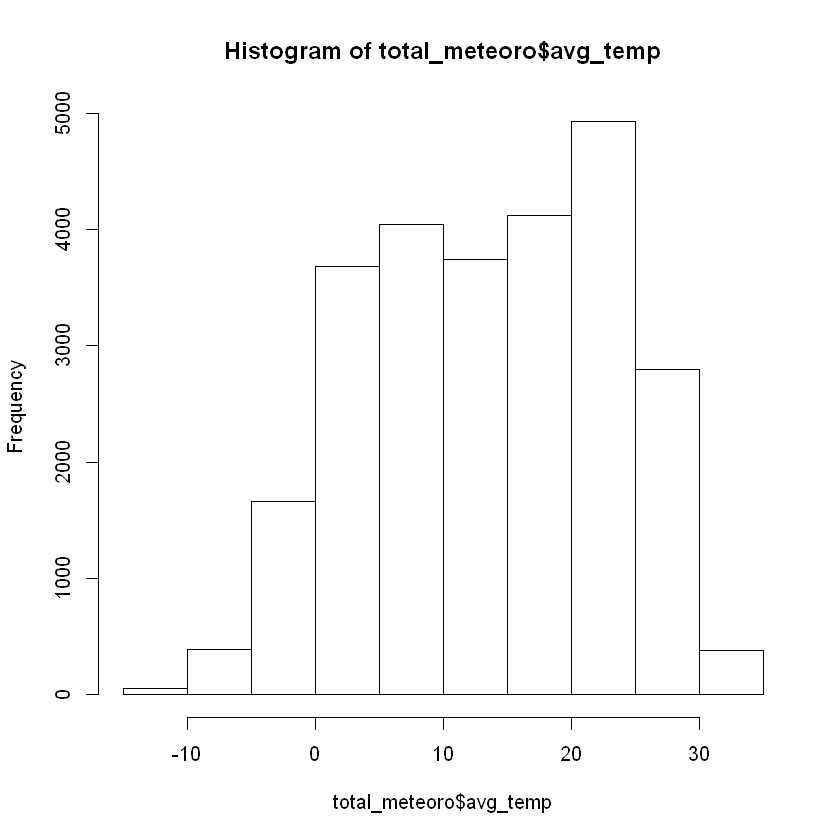

In [58]:
# Creación del Histograma
hist(total_meteoro$avg_temp)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


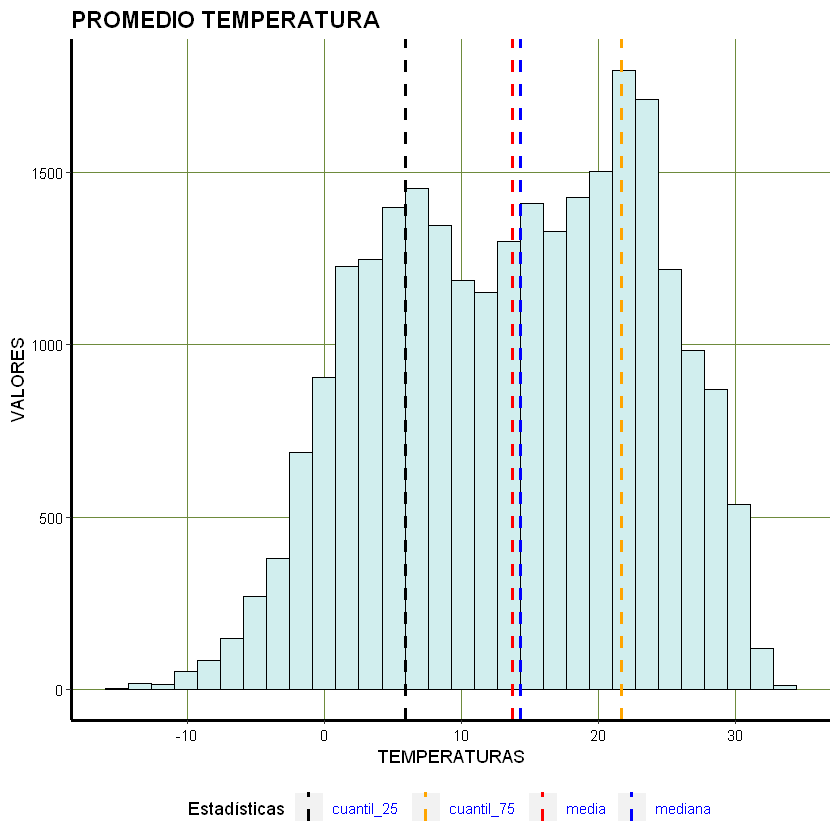

In [56]:
RellenoBarras <- "lightcyan2"
LineaBarras <- "black"

ggplot(aes(x = total_meteoro$avg_temp), data = total_meteoro) + 
      geom_histogram(colour = LineaBarras, fill = RellenoBarras) +
      labs(title="PROMEDIO TEMPERATURA") +
      theme(axis.line = element_line(size=1, colour = "black"),
              # Líneas de división mayores de la escala de los ejes del Gráfico de color azul
              panel.grid.major = element_line(colour = "darkolivegreen4"),
              # Líneas de división menores de la escala de los ejes del Gráfico de color blanco
              panel.grid.minor = element_blank(),
              # Bordes dl Gráfico de color Blanco
              panel.border = element_blank(), panel.background = element_blank(),
              # Formato Título: Tamaños 14 y Negrita
              plot.title = element_text(size = 14, face = "bold"),
              # Eje X de color negro. Tamaño fuente 9
              axis.text.x=element_text(colour="black", size = 9),
              # Ponemos la leyenda en la parte infrior
              legend.position="bottom",
              # Texto de la leyenda n azul. Tamaño de fuent 9
              legend.text=element_text(colour="blue",size=9),
              # Eje Y de color negro. Tamaño fuente 9
              axis.text.y=element_text(colour="black", size = 9))+

# Mostrar la Mediana
      geom_vline(aes(xintercept=median(total_meteoro$avg_temp),
                 color="mediana"), linetype="dashed",
             size=1) +
# Mostrar la Media
      geom_vline(aes(xintercept = mean(total_meteoro$avg_temp),
                 color="media"), linetype="dashed",
             size=1) +
# Mostrar el Cuantil 25
      geom_vline(aes(xintercept = quantile(total_meteoro$avg_temp, 0.25),
                 color="cuantil_25"), linetype="dashed",
             size=1) +
# Mostrar el Cuantil 75
      geom_vline(aes(xintercept = quantile(total_meteoro$avg_temp, 0.75),
                 color="cuantil_75"), linetype="dashed",
             size=1) +
# Nombre d la Leyenda ·Estadísticas". Colores de las medidas: Medina (Azul), Media (Rojo), Cuantil 25 (Negro)
# y Cuantil 75 (Naranja) 
        scale_color_manual(name = "Estadísticas", values = c(mediana = "blue", media = "red", cuantil_25 = "black", 
                                                     cuantil_75 = "orange"))+
# Texto del eje X "TOTAL CASOS CONFIMADOS POR PROVINCIA" y del eje Y "Nº DE CASOS"
  xlab("TEMPERATURAS") + ylab("VALORES")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


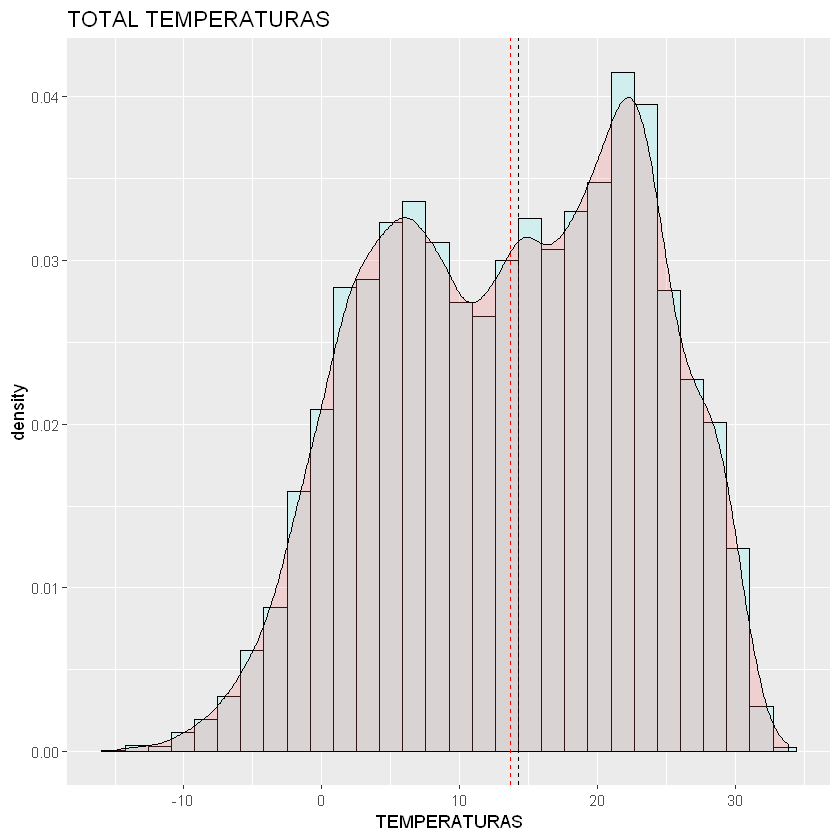

In [57]:
# Histogram with density plot
ggplot(total_meteoro, aes(x=total_meteoro$avg_temp)) + 
     geom_histogram(aes(y=..density..), colour="black", fill="lightcyan2")+
     geom_density(alpha=.2, fill="#FF6666") +
     geom_vline(aes(xintercept=median(total_meteoro$avg_temp)),color="black", linetype="dashed") + 
     geom_vline(aes(xintercept=mean(total_meteoro$avg_temp)),color="red", linetype="dashed") +
     labs(title="TOTAL TEMPERATURAS") + xlab("TEMPERATURAS")

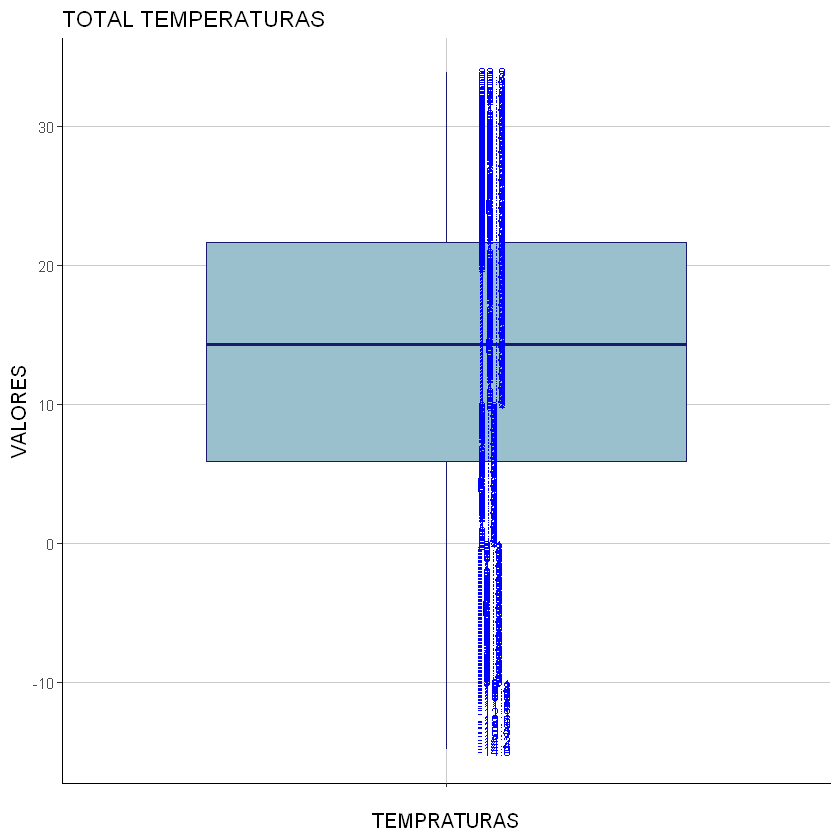

In [61]:
# Creamos dos variables para poner el color de relleno de la caja, y el color del borde de la caja Estas variables
# serán pasadas en la geometría
relleno <- "lightblue3"
linea <- "midnightblue"

bp2 <- ggplot(total_meteoro, aes(x = "", y = total_meteoro$avg_temp)) +
        # Mostramos los Outliers con forma de cuadrado, y de color verde
        geom_boxplot(fill = relleno, colour = linea,outlier.colour = "green", outlier.size = 6,outlier.shape = 22) +
        scale_y_continuous(name = "VALORES") + 
        scale_x_discrete(name = "TEMPERATURAS") +
        ggtitle("TOTAL TEMPERATURAS") +
        # Ponemos color Negro a los ejes X e Y
        theme(axis.line.x = element_line(size = 0.5, colour = "black"),
              axis.line.y = element_line(size = 0.5, colour = "black"),
              axis.title = element_text(size = 12),
              # Ponemos título al Gráficco
              legend.text = element_text(size = 9),
              legend.title=element_text(face = "bold", size = 9),
              # Mostramos la escala mayor
              panel.grid.major = element_line(colour = "snow3"),
              panel.grid.minor = element_blank(),
              panel.border = element_blank(),
              #Ponrmos Blanco como color de fondo del Gráfico
              panel.background = element_blank()) +
          # Mostramos los valores de los Anchos de Sépalo
          geom_text(aes(label=total_meteoro$avg_temp),hjust=0,nudge_x=0.05,color="blue",size=3)

bp2

# Medidas de Dispersión

In [62]:
# Cálculo de la varianza
var(total_meteoro$avg_temp)

[1] 90.6208

In [63]:
# Cálculo de la desviación Típica
sd(total_meteoro$avg_temp)

[1] 9.519496

# Medidas de Forma

In [64]:
# install.packages("e1071")
library(e1071)

In [65]:
# Cálculo del Coeficiente de Simetría
skewness(total_meteoro$avg_temp)

[1] -0.1636963

In [66]:
#Prueba de Shapiro Wilk (muestras pequeñas)
shapiro.test(total_meteoro$avg_temp)

ERROR: Error in shapiro.test(total_meteoro$avg_temp): sample size must be between 3 and 5000


In [67]:
# Cálculo de la Kurtosis
kurtosis(total_meteoro$avg_temp)

[1] -0.9387225